Flight Price Prediction
Problem Statement:
Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

Size of training set: 10683 records

Size of test set: 2671 records

So, our goal is to predict the flight price for the test set. :)

In [1]:
    # importing required libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
!pip install openpyxl

In [3]:
# reading train and test data
train_data = pd.read_excel('Data_Train.xlsx')
test_data = pd.read_excel('Test_set.xlsx')

In [4]:
#shape of train set
train_data.shape

(10683, 11)

In [5]:
#shape of test set
test_data.shape

(2671, 10)

In [6]:
#chekcing the missing values for test set before checking the accuracy of our selected model on test set
test_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

train dataset has 8523 rows and 12 features and test has 5681 rows and 11 columns. train has 1 extra column which is the target variable. We will predict this target variable for the test dataset later in this tutorial.



In [7]:
#checking and study briefly the train set sample before we do nothing:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


1. Airline features gives us the flight companies names, which we can use to separate the flight data by different airlines for comaprison.
2. The Date of Journey can be used in different ways. As an example, we can say we can separate and analytse the data we have through months or years or even day by day.
3. The source and Destination helps us understand where the flight comes from and went to. :)
4. The Route colum contains the citied through which the flight went. Can give us useful information about the distance and stops of a flight.
5. The Dep time and Aarrival Time shows the time of arrival and departure of each flight. So, we can use time to calculate the hours or minutes of Duration or even we can study the flights by time of arrival or departure.
2. The Arrival time column has dates attached along with, which we can separte and these are the cases when the flight takes off from the source on a date and reaches its destination on the next day.
3. The Duration is more useful as it calcultes the time the flight takes to arrive to their destination.
4. The total stops also has text ‘stops’ added along with the number of stops, and certain columns as ‘non-stop’, which we will need to convert to integer types.

In [8]:
#statistical description of the data of numerical festures which in this case is Price
train_data.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


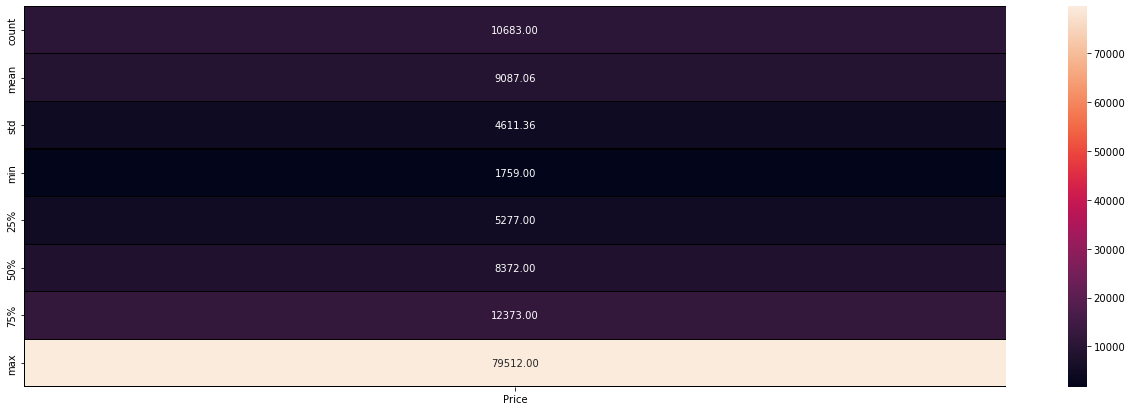

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(22,7))
sns.heatmap(train_data.describe(),annot=True,linewidth=0.1,linecolor="black",fmt="0.2f")

As we said, the target Price is the only variable that is in integer format.

In order to check the statistical description of the remaining features, we need to convert them to a numerical data type if needed.

In [10]:
train_data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

We now check the count of NaN (null) values in our dataset:

In [11]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

We have 1 missing value in Route column and 1 missing value in Total stops column. Let's fix these 2 missing values!

In [12]:
train_data['Route'] = train_data['Route'].fillna(train_data['Route'].mode()[0]) #filling na with mode of feature Route
train_data['Total_Stops'] = train_data['Total_Stops'].fillna(train_data['Total_Stops'].mode()[0]) #filling na with mode of feature Total Stops

In [13]:
#Now checking the data.info() so that we can confirm the missing values are imputed correctly alongside other type of info that can 
#be useful to check
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10683 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10683 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


As we can check we have the total number of rows for each feature we have, which means no missing values are left. Which in the other words means that we have imputed the initial missing 2 values correctly.

Here we can check information of data type and information about number of values present in each column, and data types of each column. We observe that we have all the columns as ‘object’ data types, and only ‘Price’ column (the output) is of integer type. 

And we also can check the total of columns and total of rows we have in our dataset. In this we have a total of 10.683 entries and total of 11 features including the target variable.


We now start exploring the columns available in our dataset. The first thing we do is to check the unique values present in these columns and their correspondents counts:

In [14]:
for col in train_data.columns:    
    print(train_data[col].value_counts())
    print('---------------------------------------')

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64
---------------------------------------
18/05/2019    504
6/06/2019     503
21/05/2019    497
9/06/2019     495
12/06/2019    493
9/05/2019     484
21/03/2019    423
15/05/2019    405
27/05/2019    382
27/06/2019    355
24/06/2019    351
1/06/2019     342
3/06/2019     333
15/06/2019    328
24/03/2019    323
6/03/2019     308
27/03/2019    299
24/05/2019    286
6/05/2019     282
1/05/2019     277
12/05/2019    259
1/04/2019     257
3/03/2019     218
9/03/2019     











Let's highlight the most visible characteristics of this data:
 - So, first of all, we see Airlines, from where we can highlight that Jet Airways, Indigo, Air India and Multiple carriers are the 4 companies with highest flights done and included in this dataset.
 - Secondly, regarding the dates, there are no specific dates when the flights travel; the distribution is almost similar for all dates. But we have Date_of_Journey which isnot that much important but we can highlight that the dates with highest cases of fliaghts are 18 of month may and 6th of juny, both of year 2019  - Flights in May and June have a higher count, seems like people travel during holiday months. And People tend to travel less in April.

 - Regarding the Source and Destination, we can say Delhi, Kolkata and Banglore the 3 cities with highest number of flights when we are studying the source of the flight. And Chennai has the minimum count of flight take-offs. And when checking the Destination, we have Cochin, Banglore and Delhi as the most traveled cities as a destino which means maximum flights land in Cochin and Kolkata has the lowest count of receiving the flights.
 - And regarding the routes, we have Del-Bom-Cok and Blr-Del are the 2 routes which are mostly used in our dataset. If you check more in detail, the first route is almost 60% higher when comparing with the second one. 

 - When comapring the stops , we have a total of 5626 cases if we check all the cases with only 1 stop. And we have 3491 cases of cases where we have non stop. That's interesting because 1 stop cases are 62% more than non-stop cases. Interesting!. Which means people in this dataset had more flights with one stop when compared to other options. And when comparing the third option, we see we have 1520 cases which is only 40% when comparing with total number of non stops flights. In summary, majority of the flights have stops as 1, flights with 3 and 4 stops are quite low
 - When we check the deatisl of info we have in flight reservation or check in cards, we see 78% of the cases we do not have info neither about the meals nor the baggage or any layover or change airports or if there is any business class.
 - Finally we can analize the target variale which is the price of the flight ticket: we see the highest number of flights are around price 10 thousands which means in our datasets we may have mostly families cases.


We will see that
 - Dep_Time_Hour:
Majority of the flights tend to fly in the early morning time
Count of flights taking off during 16:00 - 23:00 is also high, Afternoon flights are less in number.
 - Dep_Time_Min:
Most flights take off at whole hours (Mins as 00)
 - Arrival date:
In majority of the cases, flights take off and land on the same day
 - Arrival time hour:
Majority of the flights reach its destination in the evening time around 18:00-19:00
This seems to be because majority of the flights have take-off times in the morning and hence land after in the evening
 - Arrival time min:
This distribution is similar and does not give out any dedicated information
 - Travel hours:
Majority of the flights have travel time for around 2-3 hours, which seems ok since these are domestic flights
Some flights have time around 30 hours too, this could be because of the number of stops in between

In [15]:
#checking the datatypes of all features including the target whch is a integer data type :)
train_data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [16]:
#rechecking the train dataset sample:
train_data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


Text(0.5, 1.0, 'Price by Total Stops')

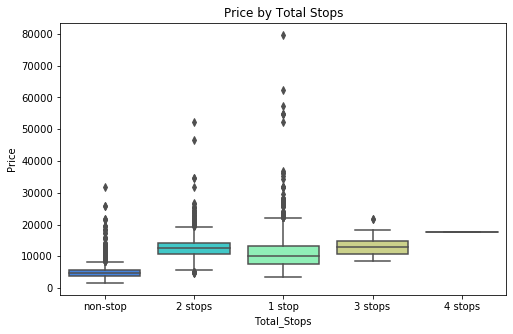

In [17]:
#boxplotting the price by total stops:
plt.figure(figsize=(8,5))
sns.boxplot(x='Total_Stops',y='Price',data=train_data, palette='rainbow')
plt.title("Price by Total Stops")

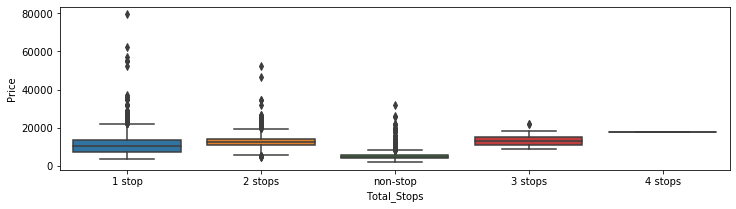

In [18]:
plt.figure(figsize=(12,3))
sns.boxplot(x='Total_Stops', y='Price', data=train_data.sort_values('Price',ascending=False)) 

We see that each increase in stops the flight price gets increased too! Also we see something interesting, we see no big difference between the median of 2 stops and 3 stops included in our dataset.

Also we cna comment that Airlines with 1 or 2 stops has outliers which can be converted as price variation. On the other side, price for airline with 4 stops is not fluctuating that much.

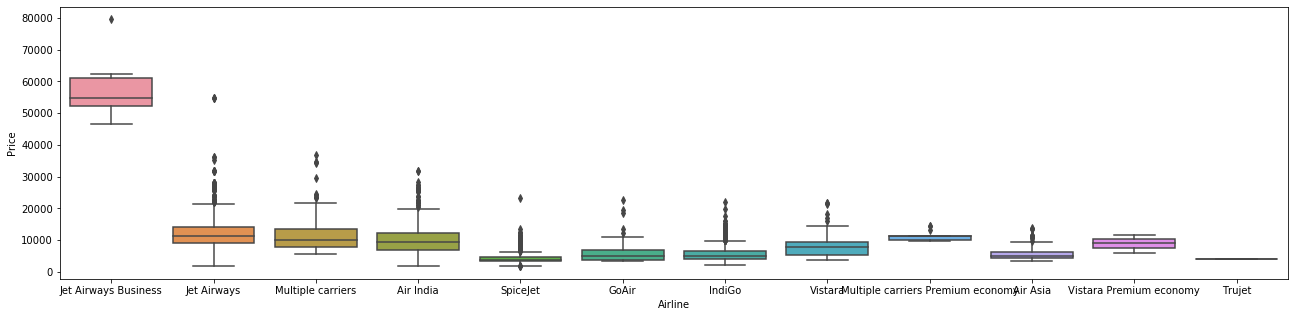

In [19]:
#oxplotting the Prices by Airlines:
plt.figure(figsize=(22,5))
sns.boxplot(x='Airline', y='Price', data=train_data.sort_values('Price',ascending=False)) 

We can see that Jet Airways Business is the highest airlines when checking the prices of the flights. And on the other hand, Trujet has the lowest price witth no such variation against the same.

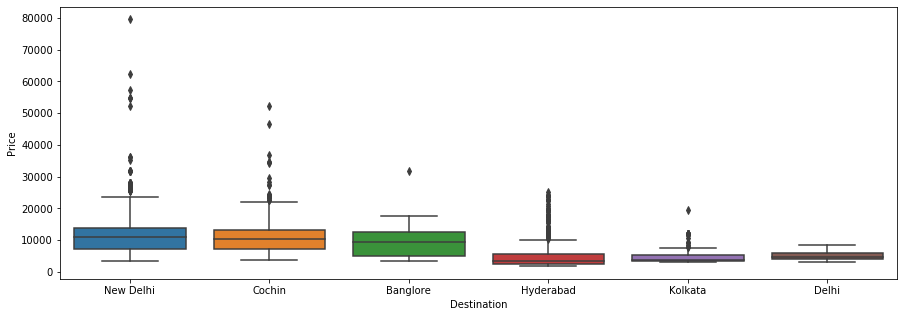

In [20]:
#boxplotting the flight price by destination:
plt.figure(figsize=(15,5))
sns.boxplot(x='Destination',y='Price',data=train_data.sort_values('Price',ascending=False))

We can come up with a conclusion all airlines had almost similar median with minimal fluctuations excluding the New Delhi and Cochin which have many outliers in the flight prices.

Text(0.5, 1.0, 'Price by Duration')

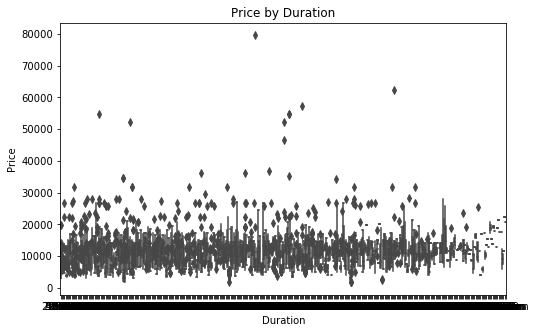

In [21]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Duration',y='Price',data=train_data, palette='rainbow')
plt.title("Price by Duration")

This graph is not that much useful to analize. Let's try another way to visualze the same data.

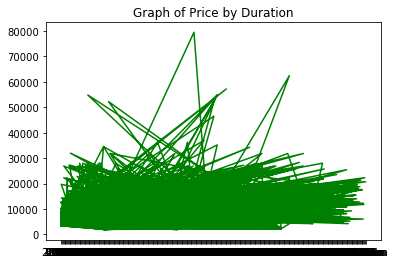

In [22]:
fig = plt.figure()
ax = plt.axes()

x = train_data['Duration']
y=train_data['Price']
plt.title('Graph of Price by Duration')
ax.plot(x, y, 'g', label='Price')

Here we can analize a bit better than compared to the previous one. Here we can see the price gets mostly betwenn 1000 and 25000.

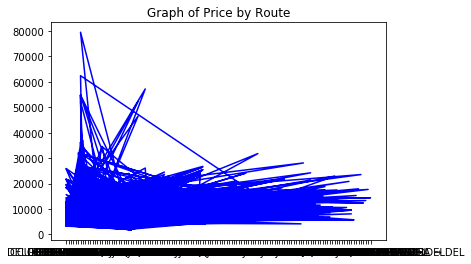

In [23]:
#Now let's plot the Price variation by Route:
fig = plt.figure()
ax = plt.axes()

x = train_data['Route']
y=train_data['Price']
plt.title('Graph of Price by Route')
ax.plot(x, y, 'b', label='Price')

Here we do not see and separate routes impact on price variation. So, let's try another plot type.

/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 99.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 66.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 92.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 88.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/cat

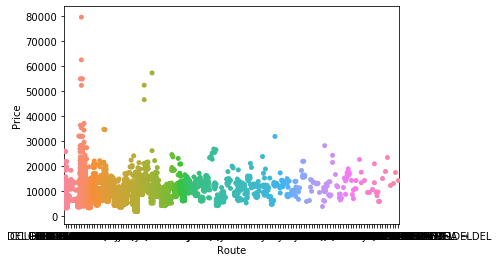

In [24]:
#we will use swrmplot in order to plot price variation by differents routes:
sns.swarmplot(x="Route", y="Price", data=train_data)

Here we also so not see the type of route but guess the colors are mentioning/classifying the different routes. SO, basically, we can check that and confirm that the route in color shade redish pink has the most variation in price compare to others routes.

We now split the Date column to extract the ‘Date’, ‘Month’ and ‘Year’ values, and store them in new columns in our dataframe.

In [25]:
train_data.Date_of_Journey=train_data.Date_of_Journey.str.split('/')

In [26]:
train_data.Date_of_Journey

0        [24, 03, 2019]
1         [1, 05, 2019]
2         [9, 06, 2019]
3        [12, 05, 2019]
4        [01, 03, 2019]
              ...      
10678     [9, 04, 2019]
10679    [27, 04, 2019]
10680    [27, 04, 2019]
10681    [01, 03, 2019]
10682     [9, 05, 2019]
Name: Date_of_Journey, Length: 10683, dtype: object

In [27]:
train_data['Date']=train_data.Date_of_Journey.str[0]
train_data['Month']=train_data.Date_of_Journey.str[1]
train_data['Year']=train_data.Date_of_Journey.str[2]

In [28]:
#we will do the similar separation for Departure time, Arrial Time and Duration:
train_data['Dep_Time']

0        22:20
1        05:50
2        09:25
3        18:05
4        16:50
         ...  
10678    19:55
10679    20:45
10680    08:20
10681    11:30
10682    10:55
Name: Dep_Time, Length: 10683, dtype: object

In [29]:
train_data['Dep_Time']=train_data.Dep_Time.str.split(':')

In [30]:
train_data['Dep_Time_Hour']=train_data.Dep_Time.str[0]
train_data['Dep_Time_Mint']=train_data.Dep_Time.str[1]

In [31]:
train_data['Arrival_Time'].unique()

array(['01:10 22 Mar', '13:15', '04:25 10 Jun', ..., '06:50 10 Mar',
       '00:05 19 Mar', '21:20 13 Mar'], dtype=object)

In [32]:
train_data.Arrival_Time.str[-1].unique()

array(['r', '5', 'n', '0', 'y'], dtype=object)

In [33]:
train_data['Arrival_Time']=train_data.Arrival_Time.str.split(' ')
train_data['Arrival_Time_Hour_Mint']=train_data.Arrival_Time.str[0]
train_data['Arrival_Time_DayDate']=train_data.Arrival_Time.str[1]
train_data['Arrival_Time_Month']=train_data.Arrival_Time.str[-1]

In [34]:
train_data['Arrival_Time_Hour_Mint']=train_data.Arrival_Time_Hour_Mint.str.split(':')
train_data['Arrival_Time_Hour']=train_data.Arrival_Time_Hour_Mint.str[0]
train_data['Arrival_Time_Mint']=train_data.Arrival_Time_Hour_Mint.str[1]


In [35]:
train_data.Arrival_Time.str[1].unique()

array(['22', nan, '10', '13', '02', '04', '28', '19', '07', '16', '25',
       '20', '23', '11', '03', '08', '05', '26', '29', '17'], dtype=object)

In [36]:
train_data.Duration=train_data.Duration.str.split(' ')

In [37]:
train_data.Duration

0        [2h, 50m]
1        [7h, 25m]
2            [19h]
3        [5h, 25m]
4        [4h, 45m]
           ...    
10678    [2h, 30m]
10679    [2h, 35m]
10680         [3h]
10681    [2h, 40m]
10682    [8h, 20m]
Name: Duration, Length: 10683, dtype: object

In [38]:
train_data['Travel_hours']=train_data.Duration.str[0]
train_data['Travel_mints']=train_data.Duration.str[1]

In [39]:
train_data['Travel_hours']


0         2h
1         7h
2        19h
3         5h
4         4h
        ... 
10678     2h
10679     2h
10680     3h
10681     2h
10682     8h
Name: Travel_hours, Length: 10683, dtype: object

In [40]:
train_data['Travel_hours']=train_data['Travel_hours'].str.split('h')
train_data['Travel_hours']=train_data['Travel_hours'].str[0]

In [41]:
train_data.Travel_hours=train_data.Travel_hours

In [42]:
train_data['Travel_mints']=train_data.Duration.str[1]
train_data['Travel_mints']

0        50m
1        25m
2        NaN
3        25m
4        45m
        ... 
10678    30m
10679    35m
10680    NaN
10681    40m
10682    20m
Name: Travel_mints, Length: 10683, dtype: object

In [43]:
train_data['Travel_mints'].nunique()

11

In [44]:
train_data['Travel_mints'].unique()

array(['50m', '25m', nan, '45m', '30m', '5m', '15m', '35m', '10m', '20m',
       '55m', '40m'], dtype=object)

In [45]:
train_data['Travel_mints']=train_data['Travel_mints'].fillna(train_data['Travel_mints'].mode()[0])

In [46]:
train_data['Travel_mints'].unique()

array(['50m', '25m', '30m', '45m', '5m', '15m', '35m', '10m', '20m',
       '55m', '40m'], dtype=object)

In [47]:
#training data columns after we have separated all the three time-related features:
train_data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Date', 'Month', 'Year', 'Dep_Time_Hour',
       'Dep_Time_Mint', 'Arrival_Time_Hour_Mint', 'Arrival_Time_DayDate',
       'Arrival_Time_Month', 'Arrival_Time_Hour', 'Arrival_Time_Mint',
       'Travel_hours', 'Travel_mints'],
      dtype='object')

In [48]:
#checking the nulls values:
train_data.isnull().sum()

Airline                      0
Date_of_Journey              0
Source                       0
Destination                  0
Route                        0
Dep_Time                     0
Arrival_Time                 0
Duration                     0
Total_Stops                  0
Additional_Info              0
Price                        0
Date                         0
Month                        0
Year                         0
Dep_Time_Hour                0
Dep_Time_Mint                0
Arrival_Time_Hour_Mint       0
Arrival_Time_DayDate      6348
Arrival_Time_Month           0
Arrival_Time_Hour            0
Arrival_Time_Mint            0
Travel_hours                 0
Travel_mints                 0
dtype: int64

In [49]:
#we will impute the null values of feature Arrival_time_dydate with mode.
train_data['Arrival_Time_DayDate']=train_data['Arrival_Time_DayDate'].fillna(train_data['Arrival_Time_DayDate'].mode()[0])

In [50]:
#we will do with route eventhough i haven't seen any missing value. But in between all the restarts i saw missing values for Route and Total stops, so i am fixing these with mode:
train_data['Route']=train_data['Route'].fillna(train_data['Route'].mode()[0])

In [51]:
train_data['Total_Stops']=train_data['Total_Stops'].fillna(train_data['Total_Stops'].mode()[0])

In [52]:
#rechecking the missing values just to make sure there is no more missing values after all the imputations:
train_data.isnull().sum()

Airline                   0
Date_of_Journey           0
Source                    0
Destination               0
Route                     0
Dep_Time                  0
Arrival_Time              0
Duration                  0
Total_Stops               0
Additional_Info           0
Price                     0
Date                      0
Month                     0
Year                      0
Dep_Time_Hour             0
Dep_Time_Mint             0
Arrival_Time_Hour_Mint    0
Arrival_Time_DayDate      0
Arrival_Time_Month        0
Arrival_Time_Hour         0
Arrival_Time_Mint         0
Travel_hours              0
Travel_mints              0
dtype: int64

In [53]:
#rechecking null values are all imputed correctly:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Airline                 10683 non-null  object
 1   Date_of_Journey         10683 non-null  object
 2   Source                  10683 non-null  object
 3   Destination             10683 non-null  object
 4   Route                   10683 non-null  object
 5   Dep_Time                10683 non-null  object
 6   Arrival_Time            10683 non-null  object
 7   Duration                10683 non-null  object
 8   Total_Stops             10683 non-null  object
 9   Additional_Info         10683 non-null  object
 10  Price                   10683 non-null  int64 
 11  Date                    10683 non-null  object
 12  Month                   10683 non-null  object
 13  Year                    10683 non-null  object
 14  Dep_Time_Hour           10683 non-null  object
 15  De

In [55]:
#separating the columns y categorical or numerical features:
categorical_data=['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route','Additional_Info']  
    
numerical=['Dep_Time_Hour', 'Dep_Time_Mint','Arrival_Time', 'Duration', 'Total_Stops','Price', 'Arrival_Time_Hour_Mint','Arrival_Time_DayDate', 'Arrival_Time_Month', 'Arrival_Time_Hour','Arrival_Time_Mint', 'Travel_hours', 'Travel_mints']

<Figure size 1440x1296 with 0 Axes>

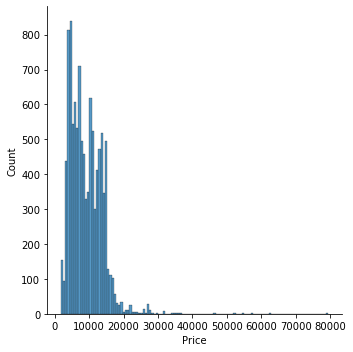

In [56]:
#ploting the Price
plt.figure(figsize=(20,18))
sns.displot(train_data.Price)

We see a right skewed distribution.

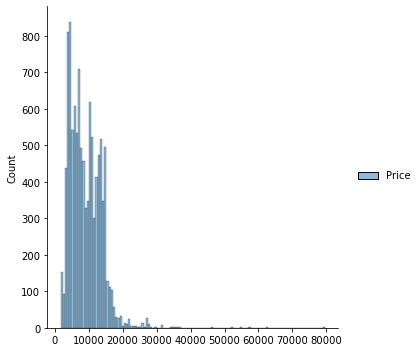

In [57]:
sns.displot(train_data)

So, yes, we have right skewed price data. 

In [58]:
#checking the cases where the price is more than 50k:
train_data[train_data.Price>=50000]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,...,Year,Dep_Time_Hour,Dep_Time_Mint,Arrival_Time_Hour_Mint,Arrival_Time_DayDate,Arrival_Time_Month,Arrival_Time_Hour,Arrival_Time_Mint,Travel_hours,Travel_mints
657,Jet Airways Business,"[01, 03, 2019]",Banglore,New Delhi,BLR → BOM → DEL,"[05, 45]",[10:45],[5h],1 stop,No info,...,2019,05,45,"[10, 45]",10,10:45,10,45,5,30m
1478,Jet Airways,"[18, 03, 2019]",Banglore,New Delhi,BLR → BOM → DEL,"[18, 40]","[00:45, 16, Mar]","[6h, 5m]",1 stop,No info,...,2019,18,40,"[00, 45]",16,Mar,00,45,6,5m
2618,Jet Airways,"[18, 03, 2019]",Banglore,New Delhi,BLR → BOM → DEL,"[22, 50]","[05:05, 16, Mar]","[6h, 15m]",1 stop,No info,...,2019,22,50,"[05, 05]",16,Mar,05,05,6,15m
2924,Jet Airways Business,"[01, 03, 2019]",Banglore,New Delhi,BLR → BOM → DEL,"[05, 45]",[11:25],"[5h, 40m]",1 stop,Business class,...,2019,05,45,"[11, 25]",10,11:25,11,25,5,40m
5372,Jet Airways Business,"[01, 03, 2019]",Banglore,New Delhi,BLR → BOM → DEL,"[05, 45]",[12:25],"[6h, 40m]",1 stop,Business class,...,2019,05,45,"[12, 25]",10,12:25,12,25,6,40m
5439,Jet Airways,"[01, 03, 2019]",Banglore,New Delhi,BLR → BOM → DEL,"[16, 55]",[23:00],"[6h, 5m]",1 stop,No info,...,2019,16,55,"[23, 00]",10,23:00,23,00,6,5m
9715,Jet Airways Business,"[6, 03, 2019]",Delhi,Cochin,DEL → ATQ → BOM → COK,"[20, 05]","[04:25, 07, Mar]","[8h, 20m]",2 stops,No info,...,2019,20,05,"[04, 25]",07,Mar,04,25,8,20m
10364,Jet Airways Business,"[01, 03, 2019]",Banglore,New Delhi,BLR → MAA → DEL,"[09, 45]",[14:25],"[4h, 40m]",1 stop,Business class,...,2019,09,45,"[14, 25]",10,14:25,14,25,4,40m


We can check above and conclude that:
- we have 8 cases of flights being more than 50k.
- For majority of the cases we have the same route — BLR->BOM->DEL.
- Business class is the majority of these cases.
- As expected, Jet Airways is the airline company.
- All of these flights took flight in March, interesting!! very interesting!

In [60]:
#lael encoding the columns with object type data:

from sklearn.preprocessing import LabelEncoder

for col in train_data.columns:
        if train_data[col].dtype == object:
            #train_data[col] = LabelEncoder().fit_transform(train_data[col])
            train_data[col] = LabelEncoder().fit_transform(train_data[col].astype(str))

In [61]:
#just checking to make sure we have numerical data type
train_data['Dep_Time']

0        211
1         31
2         70
3        164
4        149
        ... 
10678    183
10679    193
10680     58
10681     92
10682     85
Name: Dep_Time, Length: 10683, dtype: int64

In [62]:
#rechecking the datatype to make sure we have all features as integer including our target feature:
train_data.dtypes

Airline                   int64
Date_of_Journey           int64
Source                    int64
Destination               int64
Route                     int64
Dep_Time                  int64
Arrival_Time              int64
Duration                  int64
Total_Stops               int64
Additional_Info           int64
Price                     int64
Date                      int64
Month                     int64
Year                      int64
Dep_Time_Hour             int64
Dep_Time_Mint             int64
Arrival_Time_Hour_Mint    int64
Arrival_Time_DayDate      int64
Arrival_Time_Month        int64
Arrival_Time_Hour         int64
Arrival_Time_Mint         int64
Travel_hours              int64
Travel_mints              int64
dtype: object

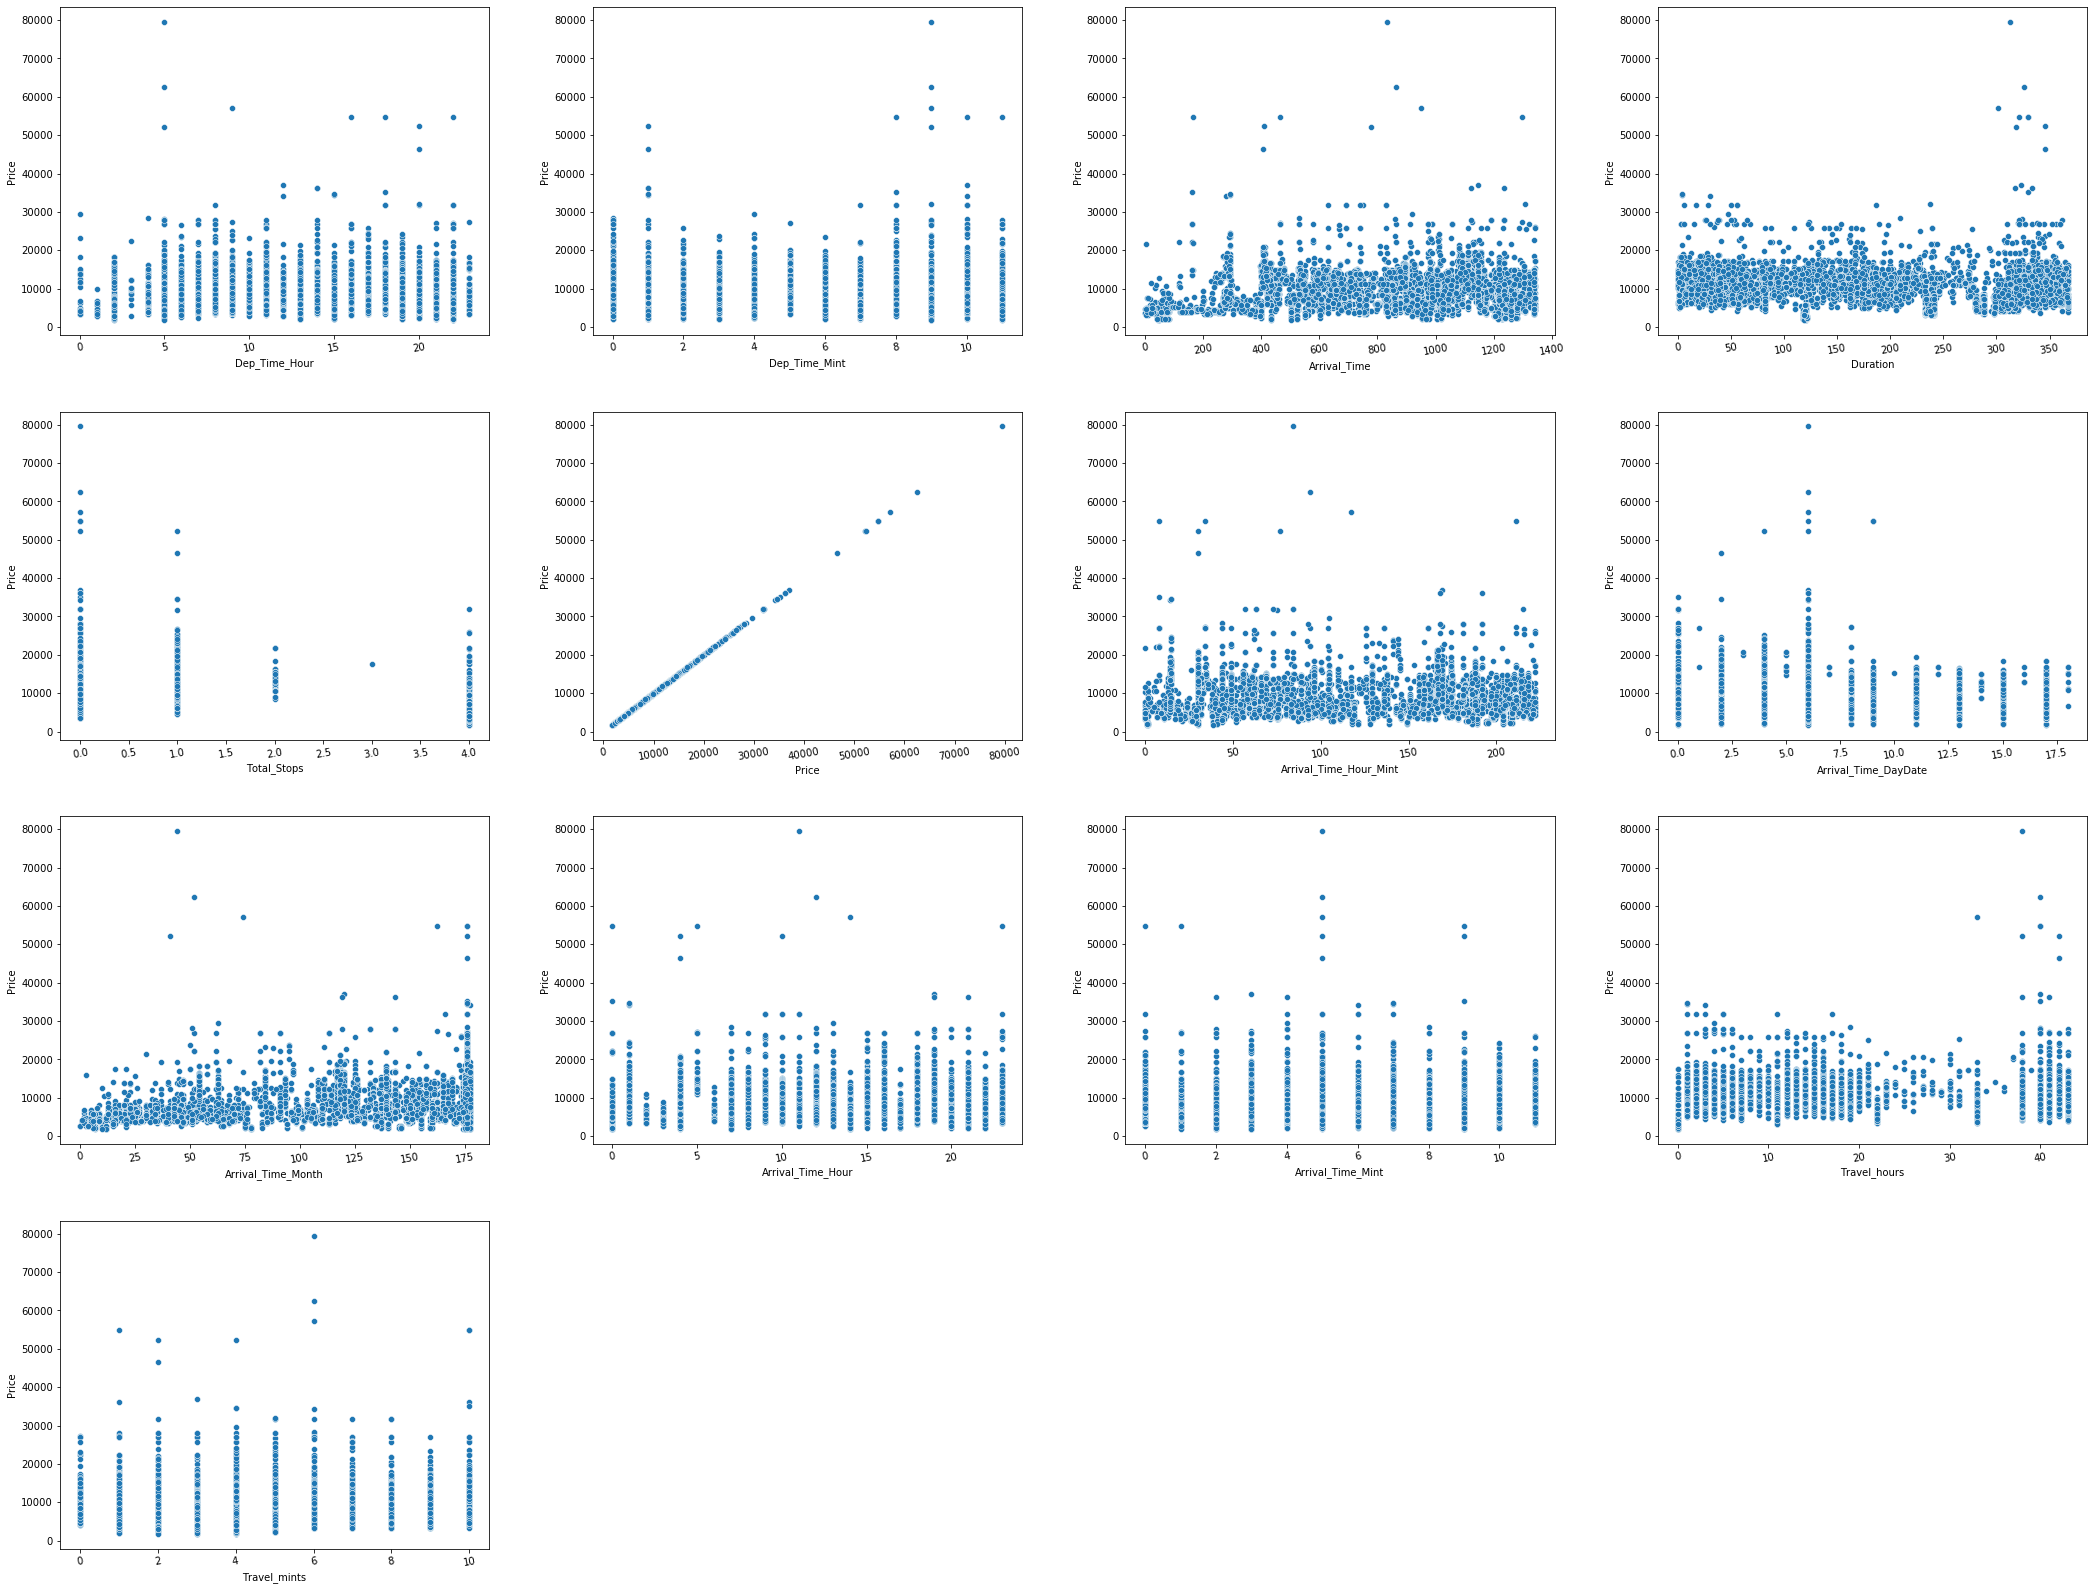

In [63]:
#Price in relation to numerical data:
c=1
plt.figure(figsize=(30,45))
for i in numerical:
    plt.subplot(8,4,c)
    sns.scatterplot(x =train_data[i], y=train_data.Price)
    plt.xticks(rotation=10)
    plt.tight_layout(pad=4)
    c=c+1
plt.show()

Let's comment and highlight the relations where we can from the above boxplots:

-Lower price for early departures and early arrival.
-Stops increase impact on price range. As the stops increases, the price variation decreases and it gets smaller close to smaller prices range.
- Way less flights to be happening with 3 stops than 4 stops or 2 stops.
- Flight prices decreses b every passing arrival time.
- High price flights are lesser during end of month
- Prices are higher in the month of March
- With increase in travel hours, price increases.

Let's distplot and check if we have the same conclusions!

/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibili

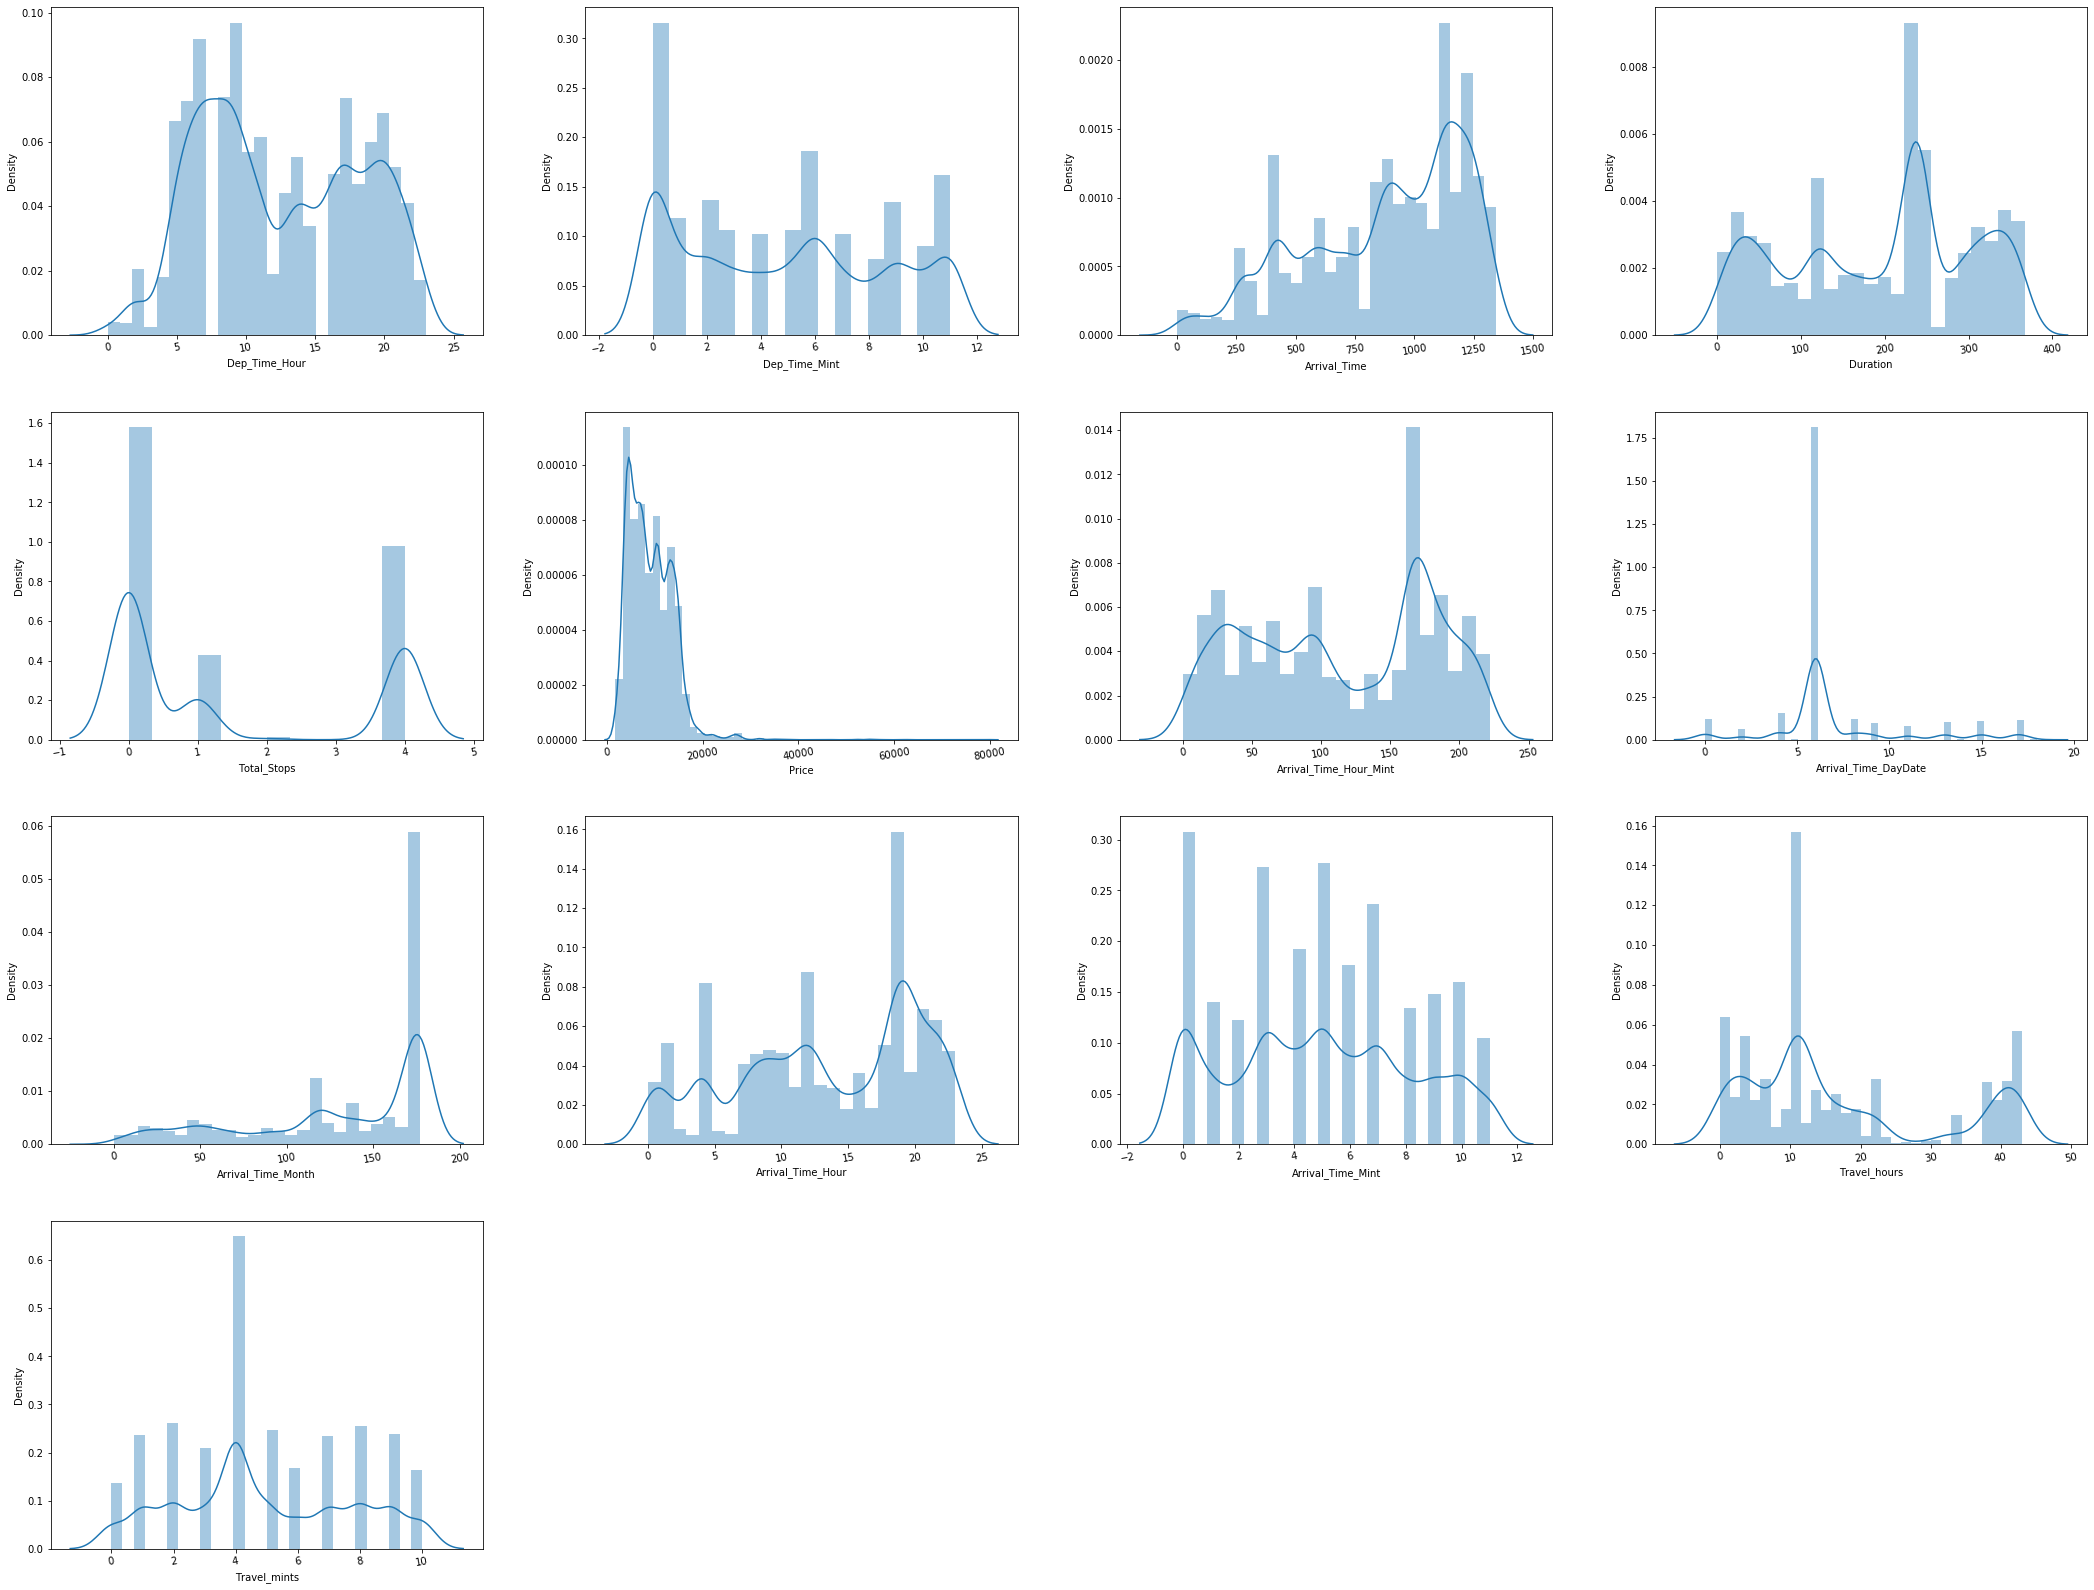

In [ ]:
plt.figure(figsize=(30,45))
c=1
for i in numerical:
    plt.subplot(8,4,c)
    sns.distplot(train_data[i])                                 #sns.scatterplot(x =train_data[i], y=train_data.Price)
    plt.xticks(rotation=10)
    plt.tight_layout(pad=4)
    c=c+1
plt.show()

We make the below observations from the numerical data –
Total stops
Majority of the flights have 0 stops, in second position we have flights with 4 stops. And in third position we have flights with only 1 stops.
Regarding the flights with  or 4 stops, we have very few cases when it happens.


More flights tend to fly in the early morning time but flights are seem to be happening all day along.
Count of flights taking off during morning and afternoon-night is also high, but we have afternoon flights are less in number.
Most flights take off at whole hours and the flights take off and land on the same day
 And if we check arrival time, majority of the flights reach its destination in the evening time around afternoon hour. This seems to be because majority of the flights have take-off times in the morning and hence land after in the evening.
Arrival Time Minutes: there is no such distribution as it is similar but we can notice that as the minutes decreases the flights number decreses also.
Travel hours: most of the flights have travel time for around 2-3 hours, which is ok since these are local-domestic flights.
Travel minutes:  the data is distributed at the average level. The only thing that stands out is the travel minutes of 30minutes which can be the case due to domestic local flights between different cities that are close.
And finally, the distribution is almost similar for all dates.

/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


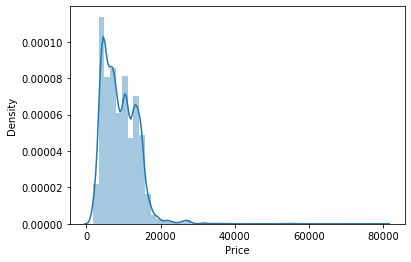

In [65]:
#Distibution of ‘Price’ column:
sns.distplot(train_data.Price)

Regarding the price target, the majority of the flights have price range between around 2k–20k and then the flights decreses after the price range over 20k. Flights having prices greater than 20k are quite less. Price range is skewed towards right. As we said earlier in the analisis, we have right skewness in the target price.
We will now compare several independent features with ‘Price’ column to check their impact:

In [66]:
#defining the plot function:
def plot(df,col):
    fig,(ax1,ax2)=plt.subplots(2,1)
    sns.distplot(df[col],ax=ax1)
    sns.boxplot(df[col],ax=ax2)

/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


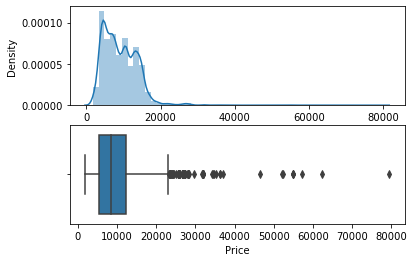

In [67]:
#let's plot 'Price':
plot(train_data,'Price')

If we check density, as we said, we have range of 2k and 20k.  So, the distribution has right skewness.
And then, if we check boxplot, we see a median on around 9k which means outliers taking place between 22k and 80k are impacting way more than the other cases.

In [68]:
#columns
train_data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Date', 'Month', 'Year', 'Dep_Time_Hour',
       'Dep_Time_Mint', 'Arrival_Time_Hour_Mint', 'Arrival_Time_DayDate',
       'Arrival_Time_Month', 'Arrival_Time_Hour', 'Arrival_Time_Mint',
       'Travel_hours', 'Travel_mints'],
      dtype='object')

/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


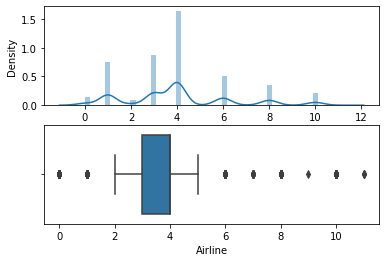

In [69]:
#plotting airlines:
plot(train_data,'Airline')

As we said, airlines Jet Airways stand out from others. And in the boxplot, we see many outliers.

/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


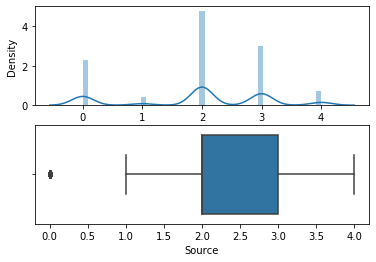

In [70]:
#plotting Origen Source of Flight:
plot(train_data,'Source')

As we said earlier, Delhi stands out as source of the flight.
And in second position, we have Kokata.

And in boxplot, we have an outlier.

/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


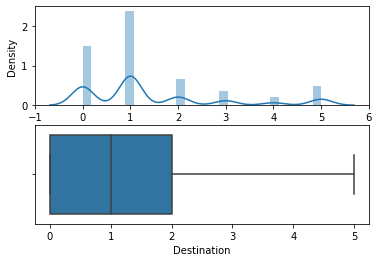

In [71]:
#plotting the destination feature:
plot(train_data,'Destination')

As we said, we have Cochin as the most traveled flight and alsothen Bangalore also stand out with 2871 flights.
In the boxplot, we can see, these 2-3 flights imapct the most of the average of the data we have as destination.

/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


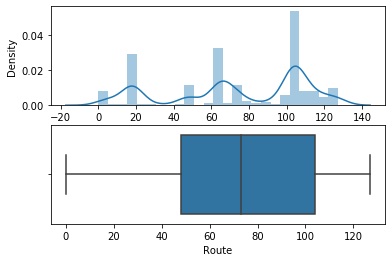

In [72]:
#plotting route:
plot(train_data,'Route')

If we check the above distribution of the routes, we should mention that the 3 most highlightes routes are :
DEL → BOM → COK, BLR → DEL and CCU → BOM → BLR.

/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


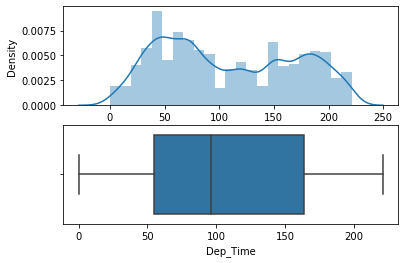

In [73]:
#plotting Depature Time:
plot(train_data,'Dep_Time')

As we can see, we distribution is almost at the average level with some ups and downs.

/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


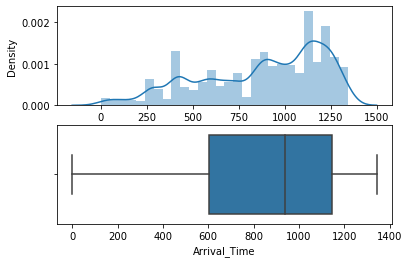

In [74]:
#plotting the arrival time:
plot(train_data,'Arrival_Time')

We notice that 3 of the cases that happens more ofthen than othert iming are the following ones: 19h, 21h and 19:15h.

/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


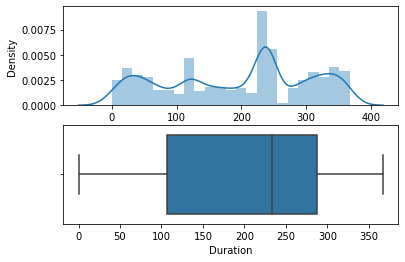

In [75]:
#plotting the Duration:
plot(train_data,'Duration')

As we already discussed the duration before, here we will only mention is that 2h 50min is the duration with highest number of flights compared to others. 
And in second place we have several durations like 1h 30min, 2h 45min, 2h 55min, and 2h 35min among others that also have a considerable number of flights.




/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


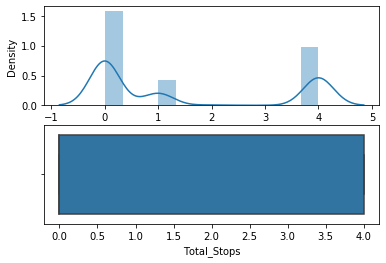

In [76]:
#plotting Total_Stops:
plot(train_data,'Total_Stops')

As we said, the stop with highest number of flights is 0 stops (0 stops, first place). After that, we can consider in second place, the flights with 4 stops in the most considered after 0 stops (4 stops, in second place). Interesting not being 1 or 2 or 3 flights as the second highest flight to be taken.

/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


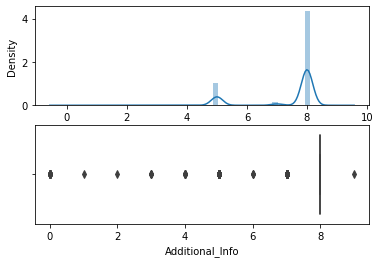

In [77]:
#plotting the additional info:
plot(train_data,'Additional_Info')

In additional info feature, we can highlight is the following:

- No info is the case that happens the most.
- In second place, we have flights cases where we have some kind of inflight meal is not included.
- And in third place, we have info of no check-in baggage included.

These are the cases we can highlight from additional info feature.

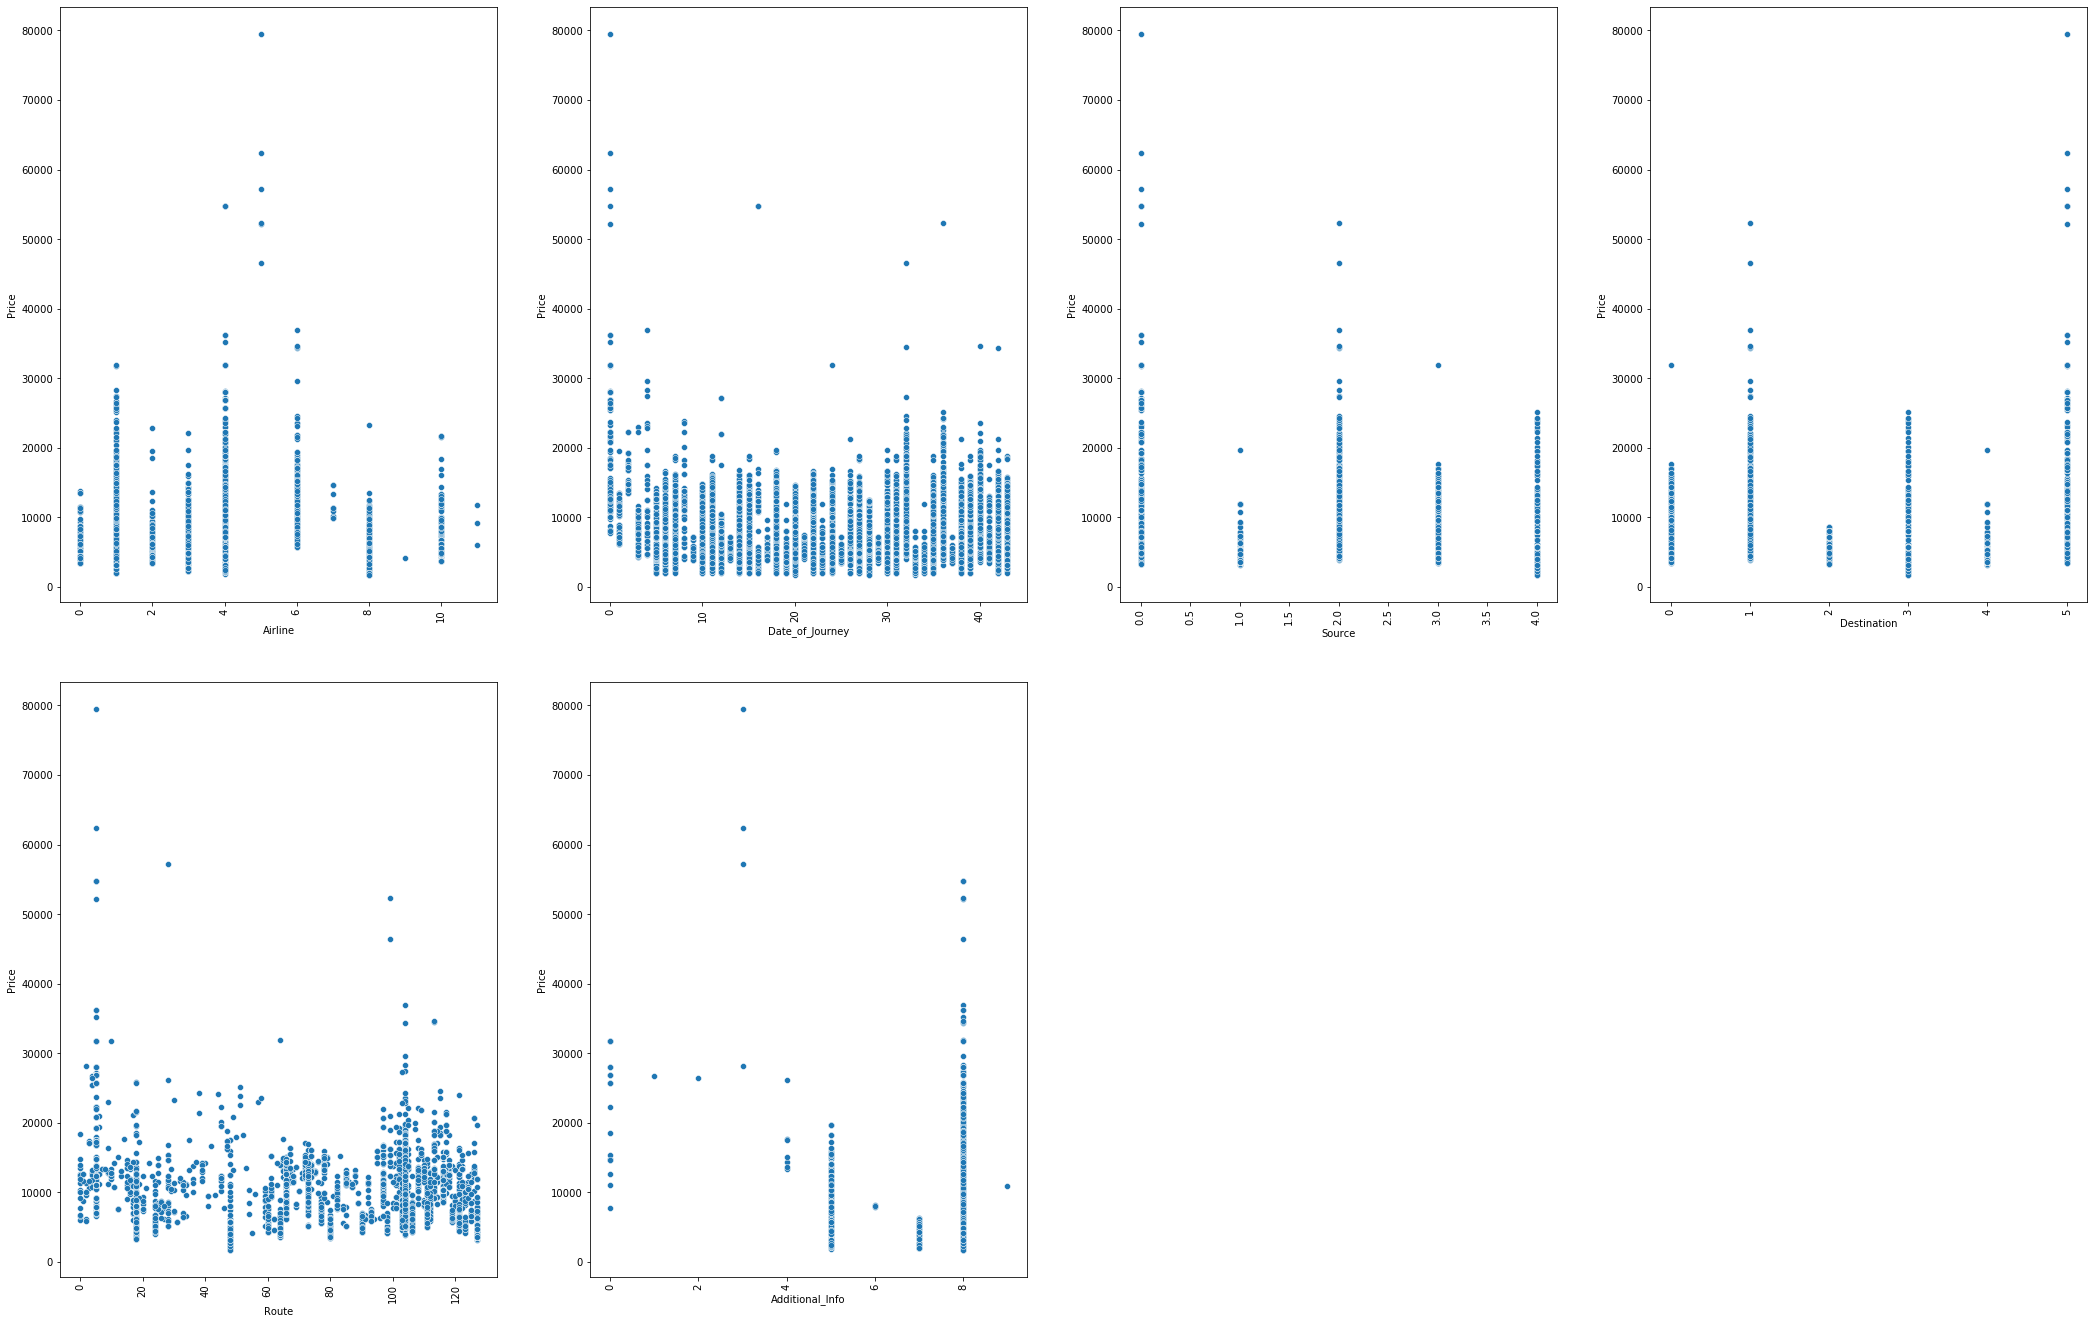

In [78]:
#checking the realtion of prices with categorical data:


c=1
plt.figure(figsize=(30,75))
for i in categorical_data:
    plt.subplot(8,4,c)
    sns.scatterplot(x =train_data[i], y=train_data.Price)
    plt.xticks(rotation=90)
    plt.tight_layout(pad=4)
    c=c+1
plt.show()

So, let's comments the categorical data we have with regards our target data:
 - So, as we already informes, Jet airways, Indigo, Air India and Multiple carriers are the companies with hightest flight occurance where we have Jet airways that gets highlighted as it far away in number of flights compard to other fights: jet airways has 3.8k flights whereas the second one Indigo has 2.0k flights. There is a huge differene between the first position and the second one.
 - Date of journed is almost distributed at the average level.
 - As Source of flight, the origen that has highest number of flights and departs more is from the airport of delhi, kolkata and Banglore.
 - As destination, we can highlight Cochin, Banglore and Delhi as the 3 airports where most of the flights land.
 - As per route, we have a considerable averag of all the routes except DEL → BOM → COK and BLR → DEL which have high number of flights.
 - As per additional info, No information about the flight details is the one that spots out the most compared to the other ones.

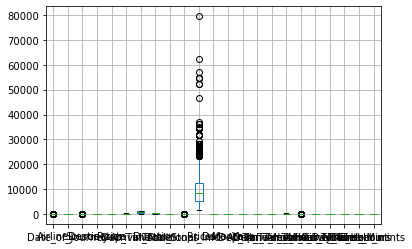

In [79]:
#We now plot boxplots to check the presence of outliers in our data
train_data.boxplot()


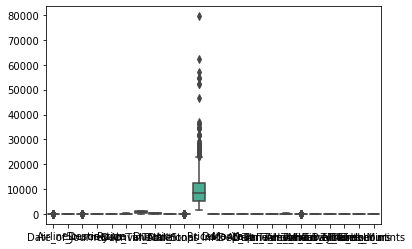

In [80]:
sns.boxplot(data=train_data)

The previous 2 boxplots of all dataframe is not useful for our visualation purposes. So, let's try again boxplotting all the columns one by one:

Airline                      AxesSubplot(0.125,0.749828;0.0824468x0.130172)
Date_of_Journey           AxesSubplot(0.223936,0.749828;0.0824468x0.130172)
Source                    AxesSubplot(0.322872,0.749828;0.0824468x0.130172)
Destination               AxesSubplot(0.421809,0.749828;0.0824468x0.130172)
Route                     AxesSubplot(0.520745,0.749828;0.0824468x0.130172)
Dep_Time                  AxesSubplot(0.619681,0.749828;0.0824468x0.130172)
Arrival_Time              AxesSubplot(0.718617,0.749828;0.0824468x0.130172)
Duration                  AxesSubplot(0.817553,0.749828;0.0824468x0.130172)
Total_Stops                  AxesSubplot(0.125,0.593621;0.0824468x0.130172)
Additional_Info           AxesSubplot(0.223936,0.593621;0.0824468x0.130172)
Price                     AxesSubplot(0.322872,0.593621;0.0824468x0.130172)
Date                      AxesSubplot(0.421809,0.593621;0.0824468x0.130172)
Month                     AxesSubplot(0.520745,0.593621;0.0824468x0.130172)
Year        

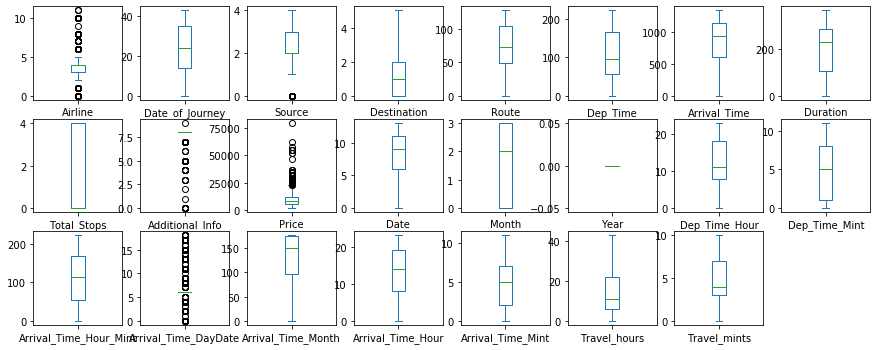

In [81]:
#plotting the boxplot for each column in order to check the outliers 
train_data.plot(kind='box',subplots = True,layout=(5,8),figsize = (15,10))

As we have already seen several times in our previous boxplots, we have many outliers in several features columns such as:

- Airlines, Source, Additional Info, Price, Arrival Time Day Date

But from here we can conclude the following as we have the whole picture of all the outliers: Depends on the proportion of the outliers with regards the whole data, we can or can not remove. And also we need to mention is the following:

- We will not remove outliers like from total stops since price is impacted by number of stops.
- Happens the same high hours of travel, it impacts more as long as the hours get increased.

This column Year has only 2019 as a value and can be dropped it.

In [82]:
#chekcing our columsn before we histogram them for skewness purposes:
train_data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Date', 'Month', 'Year', 'Dep_Time_Hour',
       'Dep_Time_Mint', 'Arrival_Time_Hour_Mint', 'Arrival_Time_DayDate',
       'Arrival_Time_Month', 'Arrival_Time_Hour', 'Arrival_Time_Mint',
       'Travel_hours', 'Travel_mints'],
      dtype='object')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f523c9a08d0>,
      dtype=object)

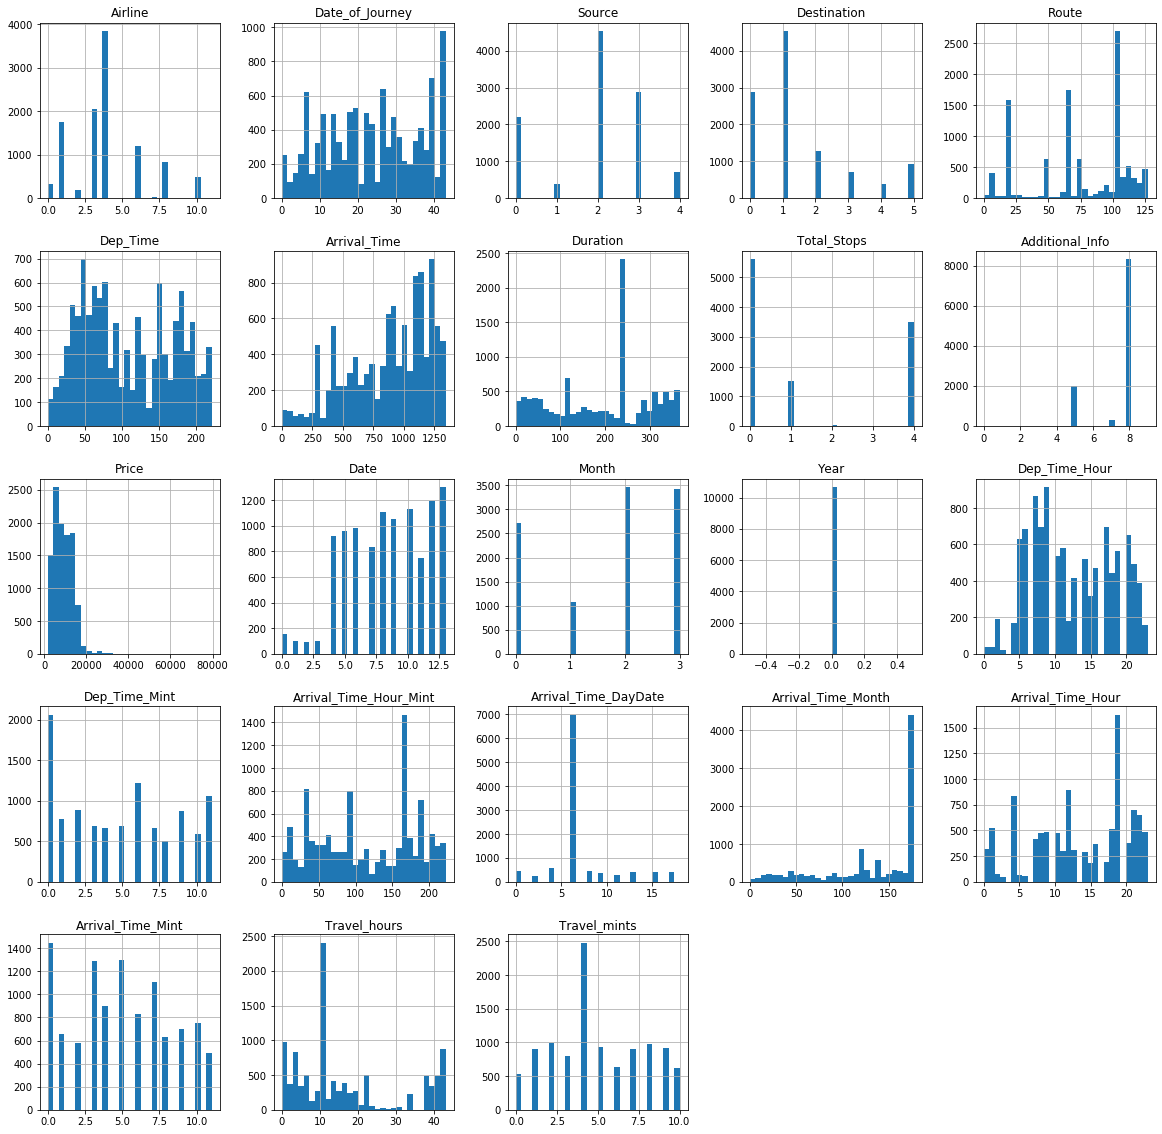

In [83]:
#we will plot histrogram for our numerical data to check skewness of the distribution:
'''Histogram : to see the numeric data distribution'''
train_data.hist(figsize=(20,20), grid = True, bins = 30)

In [84]:
#we see skewness in the above grafs. so, let's go and select numerical columns and check their corresponding skewness:
nf = train_data.select_dtypes(include=[np.number]).columns
nf

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Date', 'Month', 'Year', 'Dep_Time_Hour',
       'Dep_Time_Mint', 'Arrival_Time_Hour_Mint', 'Arrival_Time_DayDate',
       'Arrival_Time_Month', 'Arrival_Time_Hour', 'Arrival_Time_Mint',
       'Travel_hours', 'Travel_mints'],
      dtype='object')

In [85]:
#let's check skewness
from scipy.stats import skew
df=train_data
skew_list = skew(df[nf],nan_policy='omit') #sending all numericalfeatures and omitting nan values
skew_list_df = pd.concat([pd.DataFrame(nf,columns=['Features']),pd.DataFrame(skew_list,columns=['Skewness'])],axis = 1)

In [86]:
skew_list_df.sort_values(by='Skewness', ascending = False)

,Features,Skewness
10,Price,1.812298
3,Destination,1.243995
17,Arrival_Time_DayDate,1.227148
21,Travel_hours,0.789146
0,Airline,0.730992
8,Total_Stops,0.631592
5,Dep_Time,0.195028
15,Dep_Time_Mint,0.167006
22,Travel_mints,0.165990
14,Dep_Time_Hour,0.113057


We have some skewness in our data!

In [87]:
#there shouldnt be any, but checking in case for categorical data of object type:
cf = train_data.select_dtypes(include=[np.object]).columns

cf

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


Index([], dtype='object')

In [88]:
#let's check again dtypes of all columns as all of them should be integer type:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Airline                 10683 non-null  int64
 1   Date_of_Journey         10683 non-null  int64
 2   Source                  10683 non-null  int64
 3   Destination             10683 non-null  int64
 4   Route                   10683 non-null  int64
 5   Dep_Time                10683 non-null  int64
 6   Arrival_Time            10683 non-null  int64
 7   Duration                10683 non-null  int64
 8   Total_Stops             10683 non-null  int64
 9   Additional_Info         10683 non-null  int64
 10  Price                   10683 non-null  int64
 11  Date                    10683 non-null  int64
 12  Month                   10683 non-null  int64
 13  Year                    10683 non-null  int64
 14  Dep_Time_Hour           10683 non-null  int64
 15  Dep_Time_Mint      

We can see that, all 23 columns are of numeric data types. Out of 23 variables, 22 are predictor variables and the one 'Price' is the target variable. The dataset is fine since there are no null values and all data is in type numerical integer type. So, let's move forward!



In [89]:
#no null values:
train_data.isnull().sum()

Airline                   0
Date_of_Journey           0
Source                    0
Destination               0
Route                     0
Dep_Time                  0
Arrival_Time              0
Duration                  0
Total_Stops               0
Additional_Info           0
Price                     0
Date                      0
Month                     0
Year                      0
Dep_Time_Hour             0
Dep_Time_Mint             0
Arrival_Time_Hour_Mint    0
Arrival_Time_DayDate      0
Arrival_Time_Month        0
Arrival_Time_Hour         0
Arrival_Time_Mint         0
Travel_hours              0
Travel_mints              0
dtype: int64

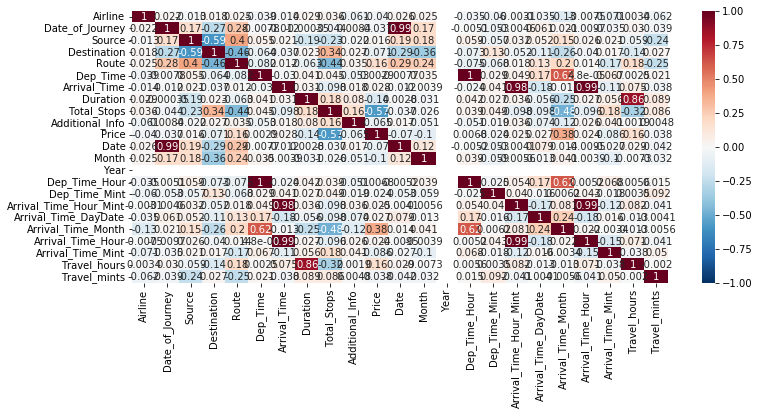

In [90]:
#Corelation between features/variables:
correlation = train_data.corr()
plt.figure(figsize=(12, 5))
sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")

Regarding the target Price, we see the features that are highly correlated with it are the Total Stops, Arrrival Time Month. Since we can't see the correlations (as i am writing down the comments days after the completion of this project, so do not want to retouch the code). Let's check plot of the correlation of the features with regards the target feature in the following code:

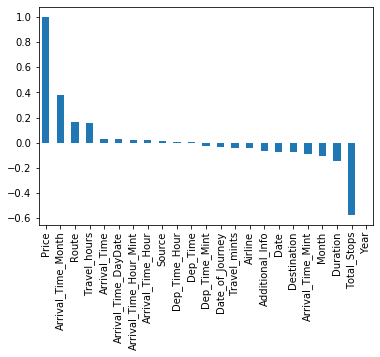

In [91]:
#correlation of independent features with regards the target "Price"
correlations =train_data.corr()['Price'].sort_values(ascending=False)
correlations.plot(kind='bar')

As we can see,  Total Stop and Arrival Month has the most impact on our Price target feature. And in third place, we have Route and Travel hours which has considerably high impact.

After the above analysis, we drop the non-required columns, which we feel have no impact on prices of flights. These columns include all the splits from the date and time of the flights.


Now let's check the features that has most impact on price:

In [92]:
correlations[abs(correlations) > 0.2]

Price                 1.000000
Arrival_Time_Month    0.382728
Total_Stops          -0.571174
Name: Price, dtype: float64

As we said, we have Total Stops and  Arrival Month as the main 2 independent features that impacts the most on the Price of the flights.

In [93]:
train_data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Date', 'Month', 'Year', 'Dep_Time_Hour',
       'Dep_Time_Mint', 'Arrival_Time_Hour_Mint', 'Arrival_Time_DayDate',
       'Arrival_Time_Month', 'Arrival_Time_Hour', 'Arrival_Time_Mint',
       'Travel_hours', 'Travel_mints'],
      dtype='object')

In [94]:
#Checking the outliers and removing them:
from scipy.stats import zscore
import numpy as np
df=train_data
z=np.abs(zscore(df))
z.shape

(10683, 23)

In [95]:
threhold=3
print(np.where(z>3))

(array([  123,   396,   486,   510,   597,   628,   657,   785,   785,
         826,   936,   946,   959,   975,  1043,  1196,  1246,  1341,
        1424,  1466,  1478,  1629,  1654,  1785,  1918,  2055,  2079,
        2099,  2108,  2405,  2481,  2495,  2495,  2556,  2556,  2618,
        2635,  2640,  2693,  2924,  2924,  3032,  3032,  3111,  3111,
        3257,  3319,  3400,  3535,  3700,  3700,  3788,  3826,  4012,
        4091,  4521,  4521,  4676,  4829,  5013,  5013,  5136,  5346,
        5372,  5372,  5439,  5628,  5662,  5701,  5710,  5719,  5738,
        5745,  5856,  5986,  6024,  6314,  6336,  6407,  6576,  6576,
        6588,  6605,  6991,  7351,  7356,  7377,  7537,  7554,  7617,
        7713,  7724,  7724,  7756,  7902,  8020,  8080,  8451,  8470,
        8536,  8598,  8682,  8821,  8856,  8940,  8957,  8957,  8990,
        9019,  9019,  9024,  9130,  9193,  9239,  9455,  9632,  9657,
        9715,  9959,  9974, 10052, 10113, 10160, 10182, 10189, 10353,
       10364, 10364

In [96]:
#checking the dataset shape (with outliers and with outliers)
df_new=df[(z<3).all(axis=1)]
print(df.shape)
print(df_new.shape)

(10683, 23)
(0, 23)


In [97]:
#Percentage of data loss:
loss_perc=1*100
loss_perc #since the loss> 10%, so we cant proceed with removing the outliers.

100

In [98]:
df_new.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Date', 'Month', 'Year', 'Dep_Time_Hour',
       'Dep_Time_Mint', 'Arrival_Time_Hour_Mint', 'Arrival_Time_DayDate',
       'Arrival_Time_Month', 'Arrival_Time_Hour', 'Arrival_Time_Mint',
       'Travel_hours', 'Travel_mints'],
      dtype='object')

In [99]:
#Now let's split the data by features (X, all except Price Column) and target outcome (Y, Price)
df_new=df
X=df_new.drop(['Price'],axis=1)
Y=df_new['Price']

In [100]:
#Transforming the data to remove the skewness:
from sklearn.preprocessing import power_transform
x=power_transform(X,method='yeo-johnson')

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/preprocessing/data.py:2863: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


In [101]:
#now we will standardrize the data 
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[-0.29549976,  0.07283158, -1.59971175, ..., -0.83278465,
        -0.1594853 ,  1.07770203],
       [-1.42029981, -1.48152376,  0.90206079, ..., -0.49063335,
         1.46050606, -0.60399577],
       [ 0.14774467,  1.48488887, -0.01210751, ...,  0.11980848,
        -0.2494795 , -0.23012891],
       ...,
       [ 0.14774467,  0.4591451 , -1.59971175, ..., -0.17544129,
         0.59998604, -0.23012891],
       [ 2.12289615, -2.15725197, -1.59971175, ..., -0.83278465,
        -0.1594853 ,  0.45363697],
       [-1.42029981,  1.41384392, -0.01210751, ..., -0.49063335,
         1.49765193, -1.00885131]])

In [103]:
# Import library for VIF to check the multicolinearity:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def CalculateVIF(Data):
 # Calculating VIF
     vif = dict()
     vif["FeatureColumns"] = Data.columns
     vif["VIF"] = [variance_inflation_factor(Data.values, i) for i in range(Data.shape[1])]
     return(pd.DataFrame(vif))


CalculateVIF(df_new).sort_values(by='VIF',ascending=False)

/srv/conda/envs/notebook/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1740: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


,FeatureColumns,VIF
14,Dep_Time_Hour,2395.126660
5,Dep_Time,1684.762286
19,Arrival_Time_Hour,1389.260504
6,Arrival_Time,702.859511
11,Date,564.788560
16,Arrival_Time_Hour_Mint,493.341117
1,Date_of_Journey,338.573836
7,Duration,177.774532
21,Travel_hours,115.020603
9,Additional_Info,36.550034


Oh great! We do have such a high values of VIF! Which means we need to remove some of the independent features in order to get less rate of VIFS which hence means less multicolinearity.

In [104]:
#let's start dropping the column Departure Time Hour as it has the highest VIF value:
df_new=df_new.drop(['Dep_Time_Hour'],axis=1)
CalculateVIF(df_new).sort_values(by='VIF',ascending=False)

/srv/conda/envs/notebook/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1740: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


,FeatureColumns,VIF
18,Arrival_Time_Hour,1385.542618
6,Arrival_Time,664.826501
11,Date,532.017283
15,Arrival_Time_Hour_Mint,460.428342
1,Date_of_Journey,320.447115
7,Duration,177.268068
20,Travel_hours,113.948307
9,Additional_Info,34.360145
17,Arrival_Time_Month,26.344801
8,Total_Stops,21.550768


In [105]:
#let's now drop the column Arrival Time Hour as it has now the highest VIF value:
df_new=df_new.drop(['Arrival_Time_Hour'],axis=1)
CalculateVIF(df_new).sort_values(by='VIF',ascending=False)

/srv/conda/envs/notebook/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1740: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


,FeatureColumns,VIF
11,Date,531.726367
1,Date_of_Journey,320.324218
6,Arrival_Time,205.725745
7,Duration,175.148374
19,Travel_hours,111.948515
15,Arrival_Time_Hour_Mint,110.463328
9,Additional_Info,34.207272
17,Arrival_Time_Month,25.576081
8,Total_Stops,21.301865
5,Dep_Time,9.954407


In [106]:
#let's now drop the column Date as it has the highest VIF value:
df_new=df_new.drop(['Date'],axis=1)
CalculateVIF(df_new).sort_values(by='VIF',ascending=False)

/srv/conda/envs/notebook/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1740: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


,FeatureColumns,VIF
7,Duration,174.352101
6,Arrival_Time,170.885192
18,Travel_hours,111.005417
14,Arrival_Time_Hour_Mint,94.509430
9,Additional_Info,30.525151
16,Arrival_Time_Month,23.759654
8,Total_Stops,20.761301
5,Dep_Time,9.924478
4,Route,9.218745
10,Price,8.307109


In [107]:
#let's now drop the column Duration as now it has the highest VIF value:

df_new=df_new.drop(['Duration'],axis=1)
CalculateVIF(df_new).sort_values(by='VIF',ascending=False)

/srv/conda/envs/notebook/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1740: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


,FeatureColumns,VIF
6,Arrival_Time,163.251838
13,Arrival_Time_Hour_Mint,90.706241
8,Additional_Info,30.480834
15,Arrival_Time_Month,23.390897
5,Dep_Time,9.919458
4,Route,9.066681
9,Price,7.968282
2,Source,6.160307
14,Arrival_Time_DayDate,5.443853
1,Date_of_Journey,5.231891


In [108]:
#let's now drop the column Arrival Time as it has the highest VIF value:
df_new=df_new.drop(['Arrival_Time'],axis=1)
CalculateVIF(df_new).sort_values(by='VIF',ascending=False)

/srv/conda/envs/notebook/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1740: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


,FeatureColumns,VIF
7,Additional_Info,28.264960
14,Arrival_Time_Month,22.277049
5,Dep_Time,9.911653
4,Route,8.952269
8,Price,7.443190
2,Source,5.949176
13,Arrival_Time_DayDate,5.252916
1,Date_of_Journey,5.205025
6,Total_Stops,4.383343
17,Travel_mints,4.247012



Oh great! Now We do not have such a high values of VIF! Which means we can move forward with all the features we have now as these are not impacting as per multicolinearity point of view.

#so we do not have multicolinearity. Good!




In [110]:
#Now let's split the data by features (X, all except Price Column) and target outcome (Y, Price)
x=df_new.drop(['Price'],axis=1)
Y=df_new['Price']


In [111]:
#Modeling
#We now proceed to the main step of our machine learning, fitting the model and predicting the outputs. We fit the data into multiple regression models to compare the performance of all models and select the best model –

#Importing libraries 

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method

In [112]:
#split data in training and testing 
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, Y, test_size=0.25, random_state=0)

#as we previously analized, we will drop the following features as these are the less important and also because we do not have them in the testing dataset:
x=x.drop([ 'Month', 'Year',
       'Dep_Time_Mint', 'Arrival_Time_Hour_Mint', 'Arrival_Time_DayDate',
       'Arrival_Time_Month', 'Arrival_Time_Mint', 'Travel_hours',
       'Travel_mints'], axis=1)

x.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Total_Stops', 'Additional_Info'],
      dtype='object')

In [113]:
#Building Machine Learning Models
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
for i in range(0,10):
    X_train, X_test, Y_train, Y_test = train_test_split(x, Y, test_size=0.25, random_state=i)
    lr.fit(X_train,Y_train)
    pred_train=lr.predict(X_train)
    pred_test=lr.predict(X_test)
    print(f"At random state {i}, the training accuracy is:  {r2_score(Y_train,pred_train)}")
    print(f"At random state {i}, the testing accuracy is:  {r2_score(Y_test,pred_test)}")
    print("\n")

At random state 0, the training accuracy is:  0.3488647231298089
At random state 0, the testing accuracy is:  0.3562643856385631


At random state 1, the training accuracy is:  0.3509968279674851
At random state 1, the testing accuracy is:  0.3496417183612506


At random state 2, the training accuracy is:  0.3426215548940651
At random state 2, the testing accuracy is:  0.37693067679359804


At random state 3, the training accuracy is:  0.3530688499317487
At random state 3, the testing accuracy is:  0.3431606158622976


At random state 4, the training accuracy is:  0.3470800024506002
At random state 4, the testing accuracy is:  0.3622007304106566


At random state 5, the training accuracy is:  0.3529699763701851
At random state 5, the testing accuracy is:  0.3441180291684537


At random state 6, the training accuracy is:  0.353779939879706
At random state 6, the testing accuracy is:  0.34128601142824444


At random state 7, the training accuracy is:  0.34723295352417105
At random state 

In [114]:
#let's take radom state of 5

from sklearn.linear_model import LinearRegression
lr=LinearRegression()
X_train, X_test, Y_train, Y_test = train_test_split(x, Y, test_size=0.25, random_state=5)
lr.fit(X_train,Y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [115]:
#checking the R2 Score for the linear regression:
from sklearn.metrics import r2_score
pred_test=lr.predict(X_test)
print(r2_score(Y_test,pred_test))

0.37693067679359804


In [116]:
#Cross validation of the model Linear regression:
Train_accuracy=r2_score(Y_train,pred_train)
Test_accuracy=r2_score(Y_test,pred_test)

from sklearn.model_selection import cross_val_score
for j in range(2,20):
    cv_score=cross_val_score(lr,x,Y,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold {j} the CV score is {cv_mean} and accuracy score for training is {Train_accuracy} and accuracy for the testing is {Test_accuracy}")
    print("\n")

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/model_selection/_split.py:442: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  fold_sizes = np.full(n_splits, n_samples // n_splits, dtype=np.int)
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/model_selection/_split.py:102: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Depreca

At cross fold 2 the CV score is 0.3492732305625412 and accuracy score for training is -0.35985151913568014 and accuracy for the testing is 0.37693067679359804




/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/model_selection/_split.py:102: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  test_mask = np.zeros(_num_samples(X), dtype=np.bool)
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/model_selection/_split.py:102: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  test_mask = np.zeros(

At cross fold 3 the CV score is 0.3492997014278561 and accuracy score for training is -0.35985151913568014 and accuracy for the testing is 0.37693067679359804




/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/model_selection/_split.py:442: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  fold_sizes = np.full(n_splits, n_samples // n_splits, dtype=np.int)
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/model_selection/_split.py:102: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Depreca

At cross fold 4 the CV score is 0.34944098751171443 and accuracy score for training is -0.35985151913568014 and accuracy for the testing is 0.37693067679359804




/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/model_selection/_split.py:442: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  fold_sizes = np.full(n_splits, n_samples // n_splits, dtype=np.int)
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/model_selection/_split.py:102: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Depreca

At cross fold 5 the CV score is 0.3490936867241986 and accuracy score for training is -0.35985151913568014 and accuracy for the testing is 0.37693067679359804




/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/model_selection/_split.py:102: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  test_mask = np.zeros(_num_samples(X), dtype=np.bool)
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/model_selection/_split.py:102: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  test_mask = np.zeros(

At cross fold 6 the CV score is 0.3493608213414349 and accuracy score for training is -0.35985151913568014 and accuracy for the testing is 0.37693067679359804




/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/model_selection/_split.py:102: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  test_mask = np.zeros(_num_samples(X), dtype=np.bool)
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/model_selection/_split.py:102: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  test_mask = np.zeros(

At cross fold 7 the CV score is 0.3497467990528151 and accuracy score for training is -0.35985151913568014 and accuracy for the testing is 0.37693067679359804




/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/model_selection/_split.py:102: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  test_mask = np.zeros(_num_samples(X), dtype=np.bool)
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/model_selection/_split.py:102: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  test_mask = np.zeros(

At cross fold 8 the CV score is 0.3493457602031613 and accuracy score for training is -0.35985151913568014 and accuracy for the testing is 0.37693067679359804




/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/model_selection/_split.py:442: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  fold_sizes = np.full(n_splits, n_samples // n_splits, dtype=np.int)
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/model_selection/_split.py:102: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Depreca

At cross fold 9 the CV score is 0.35012732519208967 and accuracy score for training is -0.35985151913568014 and accuracy for the testing is 0.37693067679359804




/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/model_selection/_split.py:442: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  fold_sizes = np.full(n_splits, n_samples // n_splits, dtype=np.int)
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/model_selection/_split.py:102: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Depreca

At cross fold 10 the CV score is 0.35113943031336997 and accuracy score for training is -0.35985151913568014 and accuracy for the testing is 0.37693067679359804


At cross fold 11 the CV score is 0.3504723090311661 and accuracy score for training is -0.35985151913568014 and accuracy for the testing is 0.37693067679359804




/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/model_selection/_split.py:102: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  test_mask = np.zeros(_num_samples(X), dtype=np.bool)
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/model_selection/_split.py:102: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  test_mask = np.zeros(

At cross fold 12 the CV score is 0.3501003968034164 and accuracy score for training is -0.35985151913568014 and accuracy for the testing is 0.37693067679359804


At cross fold 13 the CV score is 0.35143380703535476 and accuracy score for training is -0.35985151913568014 and accuracy for the testing is 0.37693067679359804




/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/model_selection/_split.py:102: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  test_mask = np.zeros(_num_samples(X), dtype=np.bool)
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/model_selection/_split.py:102: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  test_mask = np.zeros(

At cross fold 14 the CV score is 0.35084016868077567 and accuracy score for training is -0.35985151913568014 and accuracy for the testing is 0.37693067679359804


At cross fold 15 the CV score is 0.35066683435252605 and accuracy score for training is -0.35985151913568014 and accuracy for the testing is 0.37693067679359804




/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/model_selection/_split.py:102: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  test_mask = np.zeros(_num_samples(X), dtype=np.bool)
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/model_selection/_split.py:102: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  test_mask = np.zeros(

At cross fold 16 the CV score is 0.35214517042586774 and accuracy score for training is -0.35985151913568014 and accuracy for the testing is 0.37693067679359804




/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/model_selection/_split.py:102: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  test_mask = np.zeros(_num_samples(X), dtype=np.bool)
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/model_selection/_split.py:102: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  test_mask = np.zeros(

At cross fold 17 the CV score is 0.35163497507784797 and accuracy score for training is -0.35985151913568014 and accuracy for the testing is 0.37693067679359804




/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/model_selection/_split.py:102: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  test_mask = np.zeros(_num_samples(X), dtype=np.bool)
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/model_selection/_split.py:102: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  test_mask = np.zeros(

At cross fold 18 the CV score is 0.35174338765161584 and accuracy score for training is -0.35985151913568014 and accuracy for the testing is 0.37693067679359804


At cross fold 19 the CV score is 0.3518623134816722 and accuracy score for training is -0.35985151913568014 and accuracy for the testing is 0.37693067679359804




/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/model_selection/_split.py:102: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  test_mask = np.zeros(_num_samples(X), dtype=np.bool)
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/model_selection/_split.py:102: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  test_mask = np.zeros(

In [117]:
#Regularization: importing libraries:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings 
warnings.filterwarnings('ignore')

In [118]:
#we will cross validate with Lasso techniquue
from sklearn.linear_model import Lasso
parameters={ 'alpha':[.0001,.001,.01,.1,1,10], 'random_state': list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(X_train,Y_train)
print(clf.best_params_)

{'alpha': 0.1, 'random_state': 0}


In [119]:
#checking the r2 score with Lasso technique:
ls=Lasso(alpha=1,random_state=0)
ls.fit(X_train,Y_train)
ls.score(X_train,Y_train)
pred_ls=ls.predict(X_test)
lss=r2_score(Y_test,pred_ls)
lss

0.3769078980844197

In [120]:
#best cross fold is 21
cv_score=cross_val_score(ls,x,Y,cv=21)
cv_mean=cv_score.mean()
cv_mean

0.34974901552048926

In [121]:
#let's try with Ensemble Technique including Random ForestRegressor:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

parameters={'criterion':['mse','mae'],'max_features':["auto","sqrt","log2"]}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(X_train,Y_train)
print(clf.best_params_)

{'criterion': 'mse', 'max_features': 'log2'}


In [122]:
#Checking the R2 Score an CV of Rfr:
rf=RandomForestRegressor(criterion="mse",max_features="auto")
rf.fit(X_train,Y_train)
rf.score(X_train,Y_train)
pred_decision=rf.predict(X_test)

rfs=r2_score(Y_test,pred_decision)
print('R2 score:',rfs*100)

rfscore=cross_val_score(rf,x,Y, cv=5)
rfc=rfscore.mean()
print('Cross Val Score:', rfc*100)

pred_test=rf.predict(X_test)
print(r2_score(Y_test,pred_test))

R2 score: 85.74499896504085
Cross Val Score: 84.94330412076125
0.8574499896504085


In [123]:
#cheching the differents alrorithms and compare their results:

dt=DecisionTreeRegressor()
svr=SVR()
knn=KNeighborsRegressor()
lr=LinearRegression()

x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.25,random_state=42)
for i in [dt,svr,knn,lr]:
    i.fit(x_train,y_train)
    pred=i.predict(x_test)
    test_score=r2_score(y_test,pred)
    train_score=r2_score(y_train,i.predict(x_train))
    if abs(train_score-test_score)<=0.1:
        print(i)
        print("R2 score is: ", r2_score(y_test,pred))
        print("R2 score for train data: ", r2_score(y_train,i.predict(x_train)))
        print("Mean absolute error is: ", mean_absolute_error(y_test, pred))
        print("Mean squared error is: ", mean_squared_error(y_test, pred))
        print("Root mean squared error is: ", (mean_squared_error(y_test,pred)))         

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)
R2 score is:  -0.022658103906388227
R2 score for train data:  -0.022819827446158847
Mean absolute error is:  3594.7452865418454
Mean squared error is:  20890220.525475614
Root mean squared error is:  20890220.525475614
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
R2 score is:  0.3568061189341517
R2 score for train data:  0.34876688891848884
Mean absolute error is:  2645.1370345814057
Mean squared error is:  13138762.568620928
Root mean squared error is:  13138762.568620928


We achieve the best score using K-Neighbors regressor, with an r2_score of 81%. We also obtain the minimum values for mean_absolute_error, mean_squared_error and root_mean_squared_error (regression metrics) with this model.
We try to use ensemble models to check if our performance improves using ensemble models -

In [124]:
#importing the RFR, ADBR, GBR and comparing these too:

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor

rfr=RandomForestRegressor()
adaB=AdaBoostRegressor()
gbr=GradientBoostingRegressor()


x_train, x_test, y_train, y_test=train_test_split(x,Y,test_size=0.25,random_state=42)
for i in [rfr,adaB,gbr]:
    i.fit(x_train,y_train)
    pred=i.predict(x_test)
    test_score=r2_score(y_test,pred)
    train_score=r2_score(y_train,i.predict(x_train))
    if abs(train_score-test_score)<=0.1:
        print(i)
        print("R2 score is: ", r2_score(y_test,pred))
        print("R2 score for train data: ", r2_score(y_train,i.predict(x_train)))
        print("Mean absolute error is: ", mean_absolute_error(y_test, pred))
        print("Mean squared error is: ", mean_squared_error(y_test, pred))
        print("Root mean squared error is: ", (mean_squared_error(y_test,pred)))
              

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)
R2 score is:  0.8875478141586379
R2 score for train data:  0.9513056255675094
Mean absolute error is:  798.9290653640192
Mean squared error is:  2297102.9631745405
Root mean squared error is:  2297102.9631745405
AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=None)
R2 score is:  0.1321554469313856
R2 score for train data:  0.17538604924293244
Mean absolute error is:  3442.8703162391735
Mean squared error is:  17727786.076484963
Root mean squared error is:  177

In [125]:
#we see the GBR and RFR are the best algorithms for this dataset, so let's study these 2 and compare the results:

gbr=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

gbr.fit(x_train,y_train)
pred=gbr.predict(x_test)
test_score=r2_score(y_test,pred)
train_score=r2_score(y_train,gbr.predict(x_train))
if abs(train_score-test_score)<=0.1:
    print(gbr)
    print("R2 score is: ", r2_score(y_test,pred))
    print("R2 score for train data: ", r2_score(y_train,gbr.predict(x_train)))
    print("Mean absolute error is: ", mean_absolute_error(y_test, pred))
    print("Mean squared error is: ", mean_squared_error(y_test, pred))
    print("Root mean squared error is: ", (mean_squared_error(y_test,pred)))
              

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)
R2 score is:  0.8217924258470451
R2 score for train data:  0.823871044360632
Mean absolute error is:  1324.9633728671513
Mean squared error is:  3640312.934640424
Root mean squared error is:  3640312.934640424


Random Forest model gives us the best accuracy, with an R2 score of 88.7%, but the model is overfitting on train data.
We will try to tune this model to check if we can remove overfitting.
Mean Absolute error for this model is ~798 and RMSE ~ 2297k.
Gradient boosting also gives a score of 82%, which is better than K-Neighbors and the model is not overfitting as well.
The model has mean absolute error as ~1234 and RMSE as ~1753 (near to Random forest)

Cross Validation
We will perform the cross validation of our 2 model to check if the models have any overfitting issue by using k-folds. We test the cross validation for Random forest and Gradient Boosting Regressor.

In [126]:
#checking the best cross validation for GBR and checking the mean of CV:
from sklearn.model_selection import cross_val_score
for i in range(2,9):
    cv=cross_val_score(gbr,x,y,cv=i)
    print(gbr,cv.mean())

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False) 0.7959262254499136
GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min

In [127]:
#checking the best cross validation for RFR and checking the mean of CV:
from sklearn.model_selection import cross_val_score
for i in range(2,9):
    cv=cross_val_score(rfr,x,y,cv=i)
    print(rfr,cv.mean())

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False) 0.8241165127065221
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False) 0.8369586066743916
RandomForestRegressor(bootstrap=True

The Random Forest Regressor provides us a cross validation score of 86%, and gradient boosting regressor gives a score of 80,7%. We will hypertune both the models to check if our accuracy improves.
Hypertuning the model
GridSearch CV is a technique used to validate the model with different parameter combinations, by creating a grid of parameters and trying all the combinations to compare which combination give us the best results. We should apply Grid search only on our best algorithm. ut just to make sure we are getting the best results and hence selecting the best model, we will apply grid search on our 2 model –

In [128]:
#First' on our best model:
rfr2=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False) #0.8844732565790787

rfr2.fit(x_train,y_train)
pred=rfr2.predict(x_test)
test_score=r2_score(y_test,pred)
train_score=r2_score(y_train,rfr2.predict(x_train))
if abs(train_score-test_score)<=0.3:
    print(rfr2)
    print(abs(train_score-test_score))
    print("R2 score is: ", r2_score(y_test,pred))
    print("R2 score for train data: ", r2_score(y_train,rfr2.predict(x_train)))
    print("Mean absolute error is: ", mean_absolute_error(y_test, pred))
    print("Mean squared error is: ", mean_squared_error(y_test, pred))
    print("Root mean squared error is: ", (mean_squared_error(y_test,pred)))


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)
0.07042761440290957
R2 score is:  0.8779082734244473
R2 score for train data:  0.9483358878273569
Mean absolute error is:  805.8278265925804
Mean squared error is:  2494013.476015867
Root mean squared error is:  2494013.476015867


In [ ]:
#let's search the best parameters for our best model RFR through Gridsearch:
from sklearn.model_selection import GridSearchCV
param_grid={'n_estimators':[10,50,100,200], 'max_depth':[None,1,3], 'min_samples_split': [2,4,10]}

gcv_rfr=GridSearchCV(rfr,param_grid,cv=3)

#fitting the model:

res=gcv_rfr.fit(x_train,y_train)

res.best_params_ #checking the best parameters:

{'max_depth': None, 'min_samples_split': 10, 'n_estimators': 100}

In [130]:
res.best_score_ #checking the best score for model RFR for the given parameters:

0.8334672766819973

In [131]:
#let's check rfr2:
from sklearn.model_selection import GridSearchCV
param_grid={'n_estimators':[10,50,100,200], 'max_depth':[None,1,3], 'min_samples_split': [2,4,10]}

gcv_rfr2=GridSearchCV(rfr2,param_grid,cv=3)

#fitting the model:

res2=gcv_rfr2.fit(x_train,y_train)

res2.best_params_ #checking the best parameters:

{'max_depth': None, 'min_samples_split': 10, 'n_estimators': 100}

In [132]:
res2.best_score_ #and best score for rfr2:

0.834569739183149

In [133]:
#to avoid overfitting, on our second best model too we will do the gridsearch for GBR:
param_grid2={'alpha':[0.09,0.98], 'learning_rate':[0.01,0.1],'max_depth':[5,2], 'min_samples_leaf':[1,2], 'n_estimators': [10,100]}
gcv_gd=GridSearchCV(gbr,param_grid2,cv=3)
res3=gcv_gd.fit(x_train,y_train)
res3.best_params_ #checking for best parameters:

{'alpha': 0.98,
 'learning_rate': 0.1,
 'max_depth': 5,
 'min_samples_leaf': 2,
 'n_estimators': 100}

In [134]:
res3.best_score_ #checking for best score for GBR:

0.8497178346596458

In [135]:
#creating model instance with best params for GBR model:                        
model=GradientBoostingRegressor(alpha=0.098,
                                learning_rate=0.1,
                                max_depth=5,
                                min_samples_split=2,
                                min_samples_leaf=1,
                                n_estimators=100)

model.fit(x_train,y_train)
pred=model.predict(x_test)
test_score=r2_score(y_test,pred)
train_score=r2_score(y_train,model.predict(x_train))
if abs(train_score-test_score)<=0.3:
    print(rfr2)
    print(abs(train_score-test_score))
    print("R2 score is: ", r2_score(y_test,pred))
    print("R2 score for train data: ", r2_score(y_train,model.predict(x_train)))
    print("Mean absolute error is: ", mean_absolute_error(y_test, pred))
    print("Mean squared error is: ", mean_squared_error(y_test, pred))
    print("Root mean squared error is: ", (mean_squared_error(y_test,pred)))

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)
0.02176624974294905
R2 score is:  0.8722856480117464
R2 score for train data:  0.8940518977546954
Mean absolute error is:  1050.886777281852
Mean squared error is:  2608868.9534768057
Root mean squared error is:  2608868.9534768057


The r2_score received for Gradient Boosting Regressor comes out to be better after hypertuning, which is 84,97%, as compared to Random Forest Regressor giving accuracy as 83,45%. The value of MAE also decreases, signifying that we were able to tune our model as we can see below.
Hence we select Gradient Boosting Regressor as our final model, save the model using best parameters, and create model object using pickle.

In [136]:
#another try
from sklearn.model_selection import RandomizedSearchCV
n_estimators=[int(x) for x in np.linspace(start=100, stop=1200, num=6)]
max_depth=[int(x) for x in np.linspace(start=5, stop=30, num=4)]

random_grid={
    'n_estimators': n_estimators,
    'max_features': ['auto','sqrt'],
    'max_depth':max_depth,
    'min_samples_split':[5,10,15,100]}

rf_random=RandomizedSearchCV(estimator= model, param_distributions= random_grid, cv=3, verbose=2, n_jobs=-1)
rf_random.fit(X_train, y_train)
rf_random.best_params_

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] n_estimators=1200, min_samples_split=5, max_features=sqrt, max_depth=30 


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=1200, min_samples_split=5, max_features=sqrt, max_depth=30, total=  33.0s
[CV] n_estimators=1200, min_samples_split=5, max_features=sqrt, max_depth=30 


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   33.0s remaining:    0.0s


[CV]  n_estimators=1200, min_samples_split=5, max_features=sqrt, max_depth=30, total=  28.8s
[CV] n_estimators=1200, min_samples_split=5, max_features=sqrt, max_depth=30 
[CV]  n_estimators=1200, min_samples_split=5, max_features=sqrt, max_depth=30, total=  31.4s
[CV] n_estimators=540, min_samples_split=15, max_features=auto, max_depth=13 
[CV]  n_estimators=540, min_samples_split=15, max_features=auto, max_depth=13, total=  10.6s
[CV] n_estimators=540, min_samples_split=15, max_features=auto, max_depth=13 
[CV]  n_estimators=540, min_samples_split=15, max_features=auto, max_depth=13, total=   9.7s
[CV] n_estimators=540, min_samples_split=15, max_features=auto, max_depth=13 
[CV]  n_estimators=540, min_samples_split=15, max_features=auto, max_depth=13, total=   9.1s
[CV] n_estimators=980, min_samples_split=10, max_features=auto, max_depth=5 
[CV]  n_estimators=980, min_samples_split=10, max_features=auto, max_depth=5, total=   4.3s
[CV] n_estimators=980, min_samples_split=10, max_featu

[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  6.9min finished


{'n_estimators': 100,
 'min_samples_split': 10,
 'max_features': 'sqrt',
 'max_depth': 5}

In [137]:
rf_random.best_score_ #we see the results are the worst:

-0.03184144017157867

The r2_score received for Gradient Boosting Regressor comes out to be better after hypertuning, which is 87%, as compared to Random Forest Regressor giving accuracy as 83,45%. The value of MAE also decreases, signifying that we were able to tune our model as we can see below.
Hence we select Gradient Boosting Regressor as our final model, save the model using best parameters, and create model object using pickle.

Since the best model we have is the model GBR so finally we will select it as our final model and do the predictions:

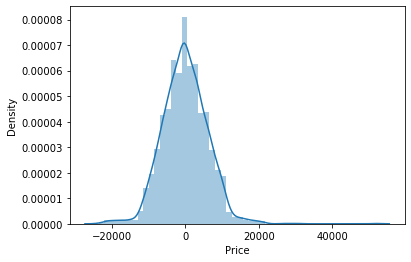

In [138]:
prediction=model.predict(X_test)
sns.distplot(y_test-prediction)

In [141]:
#r2 score of the predicted values of training values compared to actual price:
result_ontestfromtrainingset=r2_score(y_train,prediction)
abs(result_ontestfromtrainingset)

0.8170307931442393

In [142]:
#dropping aarival time and duration from testing set as we dropped them from training set:
test_data=test_data.drop([ 'Arrival_Time', 'Duration'], axis=1)

In [143]:
#label_encoding the testing categories which are object type:
from sklearn.preprocessing import LabelEncoder

for col in test_data.columns:
        if test_data[col].dtype == object:
            #train_data[col] = LabelEncoder().fit_transform(train_data[col])
            test_data[col] = LabelEncoder().fit_transform(test_data[col].astype(str))

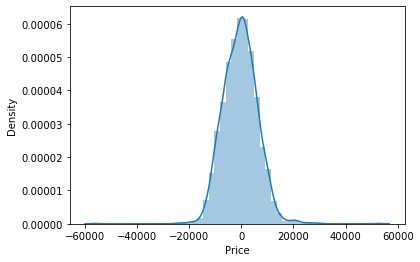

In [144]:
#prediction on the test data and check residual:
prediction=model.predict(test_data)
sns.distplot(y_test-prediction)

We have achieved an r2_score value of 81% on the training set, meaning that we are actually able to predict values quite near to the actual prices, for majority of the rows. A glimpse of our resulting dataframe is attached below for the testing set.
We load the test file, apply all the data modeling processes and operations on our test data similar to what we did with the train data, and then make the final prediction using the saved model object as follows:

In [145]:
#saving the model:
import pickle
filename='Flight.pkl'
pickle.dump(model,open(filename,'wb'))

In [147]:
#loading the model and checking the accuracy on the test data:
import pickle
loaded_model=pickle.load(open('Flight.pkl','rb'))
result=loaded_model.score(X_test,Y_test)
print(result)

0.9009477300537503


In [148]:
#90% is a good accuracy on the test data:
Conclusion=pd.DataFrame([loaded_model.predict(test_data)[:],pred_decision[:]],index=["Predicted","Original"])


In [149]:
#here you have a glimpse of test dataset:
Conclusion

,0,1,2,3,4,5,6,7,8,9,...,2661,2662,2663,2664,2665,2666,2667,2668,2669,2670
Predicted,5649.345227,9108.338021,3832.463587,4021.844432,10514.401225,4694.780856,10087.596056,25535.116054,11572.018776,10540.880188,...,11007.77748,6458.419679,18071.320959,10516.017073,5948.989116,3090.985614,8078.099701,14177.548311,14184.333547,11084.991302
Original,5740.400000,9950.735000,3108.000000,3597.000000,9836.800000,4709.100000,8579.110000,26890.000000,11840.000000,10470.016667,...,10568.50000,5789.000000,13872.000000,11982.000000,6099.200000,2732.700000,7832.000000,15290.437500,15129.000000,14172.470000


In [ ]:
okaaa! commentes_ok_fin!